## MovieLens Data Exploration and Analysis

#####  Perform Exploratory Data Analysis to identify the impact of various attributes on Movie Data

### Datasets Information:
* <u>**Data.csv:**</u> It contains information of ratings given by the users to a particular movie.
   - Columns: *user id, movie id, rating, timestamp*
* <u>**item.csv:**</u> File contains information related to the movies and its genre.
  - Columns: *movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime,       Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western*
* <u>**user.csv:**</u> It contains information of the users who have rated the movies
  - Columns: *user id, age, gender, occupation, zip code*
  
### Learning Outcomes:
* Exploratory Data Analysis
* Visualization using Python
* Pandas – groupby, merging

### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Import libraries
#### 1. Import the necessary packages - 2.5 marks

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [185]:
# Load the data into pandas dataframe
urdf = pd.read_csv("Data.csv")
midf = pd.read_csv("item.csv")
uidf = pd.read_csv("user.csv")

In [69]:
urdf.shape

(100000, 4)

In [121]:
midf.shape

(1681, 22)

In [71]:
uidf.shape

(943, 5)

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [82]:
#Merge the User data frames using the 'user id' coloumn
merged_user_df = pd.merge(left=urdf, right=uidf, how='left', left_on='user id', right_on='user id')
merged_user_df.shape

(100000, 8)

In [78]:
merged_user_df.shape

(100000, 8)

In [83]:
merged_user_df.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,186,302,3,891717742,39,F,executive,00000
2,22,377,1,878887116,25,M,writer,40206
3,244,51,2,880606923,28,M,technician,80525
4,166,346,1,886397596,47,M,educator,55113


In [84]:
#Merge the combined User data frame with the movie data frame using the 'movie id' coloumn
merged_movie_user_df = pd.merge(left=midf, right=merged_user_df, how='right', left_on='movie id', right_on='movie id')
merged_movie_user_df.shape

(100000, 29)

In [93]:
merged_movie_user_df.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'user id', 'rating',
       'timestamp', 'age', 'gender', 'occupation', 'zip code'],
      dtype='object')

In [85]:
merged_movie_user_df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,308,4,887736532,60,M,retired,95076
1,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,287,5,875334088,21,M,salesman,31211
2,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,148,4,877019411,33,M,engineer,97006
3,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,280,4,891700426,30,F,librarian,22903
4,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,66,3,883601324,23,M,student,80521


In [89]:
merged_movie_user_df.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
unknown,99991.0,1.000090e-05,3.162420e-03,0.0,0.0,0.0,0.0,1.0
Action,99991.0,2.559130e-01,4.363754e-01,0.0,0.0,0.0,1.0,1.0
Adventure,99991.0,1.375424e-01,3.444208e-01,0.0,0.0,0.0,0.0,1.0
Animation,99991.0,3.605324e-02,1.864236e-01,0.0,0.0,0.0,0.0,1.0
Childrens,99991.0,7.182646e-02,2.582016e-01,0.0,0.0,0.0,0.0,1.0
Comedy,99991.0,2.983469e-01,4.575348e-01,0.0,0.0,0.0,1.0,1.0
Crime,99991.0,8.055725e-02,2.721553e-01,0.0,0.0,0.0,0.0,1.0
Documentary,99991.0,7.580682e-03,8.673691e-02,0.0,0.0,0.0,0.0,1.0
Drama,99991.0,3.989859e-01,4.896923e-01,0.0,0.0,0.0,1.0,1.0


In [119]:
# Check column types and missing values
merged_movie_user_df.info()
# From the information below we have 9 rows in the data frame with missing movie information (100000 - 99991 = 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movie id      100000 non-null  int64  
 1   movie title   99991 non-null   object 
 2   release date  99991 non-null   object 
 3   unknown       99991 non-null   float64
 4   Action        99991 non-null   float64
 5   Adventure     99991 non-null   float64
 6   Animation     99991 non-null   float64
 7   Childrens     99991 non-null   float64
 8   Comedy        99991 non-null   float64
 9   Crime         99991 non-null   float64
 10  Documentary   99991 non-null   float64
 11  Drama         99991 non-null   float64
 12  Fantasy       99991 non-null   float64
 13  Film-Noir     99991 non-null   float64
 14  Horror        99991 non-null   float64
 15  Musical       99991 non-null   float64
 16  Mystery       99991 non-null   float64
 17  Romance       99991 non-null   float64
 18  Sci-F

In [120]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(merged_movie_user_df)

,Total,Percent
Horror,9,0.00009
Romance,9,0.00009
Crime,9,0.00009
Documentary,9,0.00009
Drama,9,0.00009
Fantasy,9,0.00009
Film-Noir,9,0.00009
Animation,9,0.00009
Musical,9,0.00009
Mystery,9,0.00009


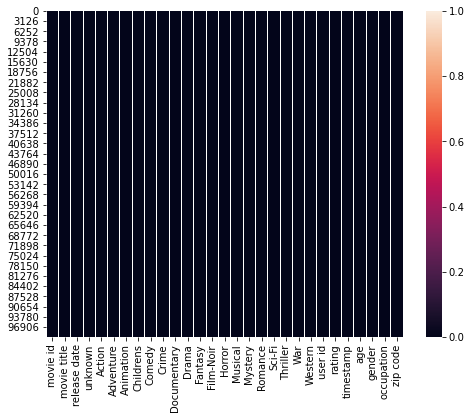

In [92]:
# Check missing values via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged_movie_user_df.isna())
plt.show()

#### 4. Find the number of movies per genre using the item data - 5 marks

In [186]:
# use sum on the default axis
midf.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [187]:
#hint: use sum on the axis = 1
temp = midf.drop(columns=['movie id', 'movie title', 'release date'])
out = temp.sum(axis=1)
index = 0
for i in out:
    if(i > 1):
        print(midf.loc[index,'movie title'],": ", i)
    index = index + 1        

Toy Story  :  3
GoldenEye  :  3
Get Shorty  :  3
Copycat  :  3
Twelve Monkeys  :  2
Babe  :  3
Richard III  :  2
Seven (Se7en)  :  2
Usual Suspects, The  :  2
Postino, Il  :  2
French Twist (Gazon maudit)  :  2
From Dusk Till Dawn  :  5
Angels and Insects  :  2
Muppet Treasure Island  :  5
Braveheart  :  3
Taxi Driver  :  2
Rumble in the Bronx  :  3
Apollo 13  :  3
Batman Forever  :  4
Crimson Tide  :  3
Desperado  :  3
Doom Generation, The  :  2
Free Willy 2: The Adventure Home  :  3
Mad Love  :  2
Net, The  :  2
Strange Days  :  3
Disclosure  :  2
Dolores Claiborne  :  2
Eat Drink Man Woman  :  2
Ed Wood  :  2
I.Q.  :  2
Star Wars  :  5
Legends of the Fall  :  4
Natural Born Killers  :  2
Outbreak  :  3
Professional, The  :  4
Pulp Fiction  :  2
Stargate  :  3
Santa Clause, The  :  2
What's Eating Gilbert Grape  :  2
While You Were Sleeping  :  2
Crow, The  :  3
Forrest Gump  :  3
Four Weddings and a Funeral  :  2
Lion King, The  :  3
Mask, The  :  3
Maverick  :  3
Faster Pussycat! K

Shall We Dance?  :  3
Country Life  :  2
Simple Wish, A  :  2
Star Kid  :  4
Kicked in the Head  :  2
Indian Summer  :  2
Love Affair  :  2
Band Wagon, The  :  2
Penny Serenade  :  2
'Til There Was You  :  2
New York Cop  :  2
Babyfever  :  2
Waiting to Exhale  :  2
Pompatus of Love, The  :  2
Palmetto  :  3
Surviving the Game  :  3
Inventing the Abbotts  :  2
Loaded  :  2
Midnight Dancers (Sibak)  :  2
Kazaam  :  3
Stefano Quantestorie  :  2
For the Moment  :  2
Johnny 100 Pesos  :  2
JLG/JLG - autoportrait de décembre  :  2
I Can't Sleep (J'ai pas sommeil)  :  2
Machine, The  :  2
Hotel de Love  :  2
Second Jungle Book: Mowgli & Baloo, The  :  2
Roseanna's Grave (For Roseanna)  :  2
Stag  :  2
Picture Bride  :  2
Caro Diario (Dear Diary)  :  2
When Night Is Falling  :  2
Swan Princess, The  :  2
Barbarella  :  2
Land Before Time III: The Time of the Great Giving (199 :  2
Next Karate Kid, The  :  2
No Escape  :  2
Highlander III: The Sorcerer  :  2
Suture  :  2
Walking Dead, The  :  

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [223]:
#drop the empty NaN Values
merged_movie_user_df = pd.merge(left=midf, right=merged_user_df, how='left', left_on='movie id', right_on='movie id')

#drop the unknow Genre
merged_movie_user_df.drop(columns=['unknown'], inplace=True)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [224]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

a = '01-Jan-1995'
print(a.split('-')[2])

brown
brown
brown
1995


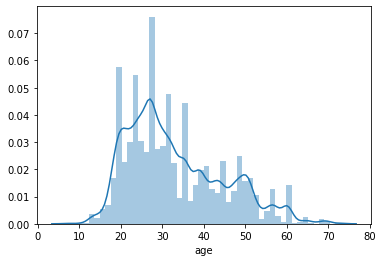

In [210]:
#your answers here
sns.distplot(merged_movie_user_df['age']);

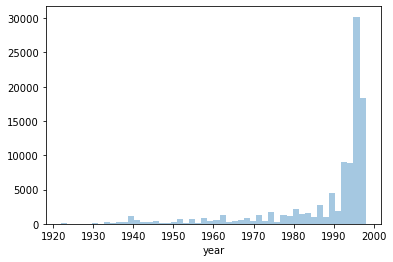

In [230]:
merged_movie_user_df['year'] = merged_movie_user_df['release date'].str.split('-').str.get(2)
sns.distplot(merged_movie_user_df['year'], kde=False);
#print(merged_movie_user_df['year'])

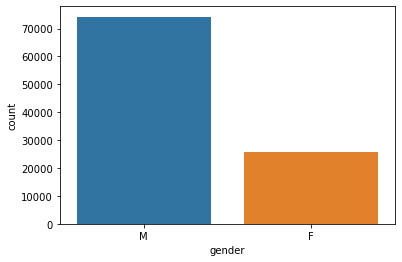

In [231]:
sns.countplot(merged_movie_user_df['gender']);

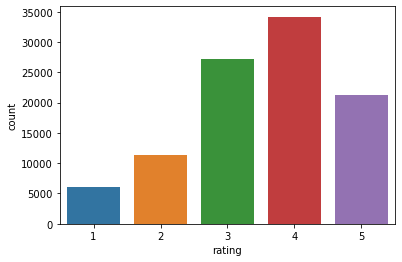

In [233]:
sns.countplot(merged_movie_user_df['rating']);

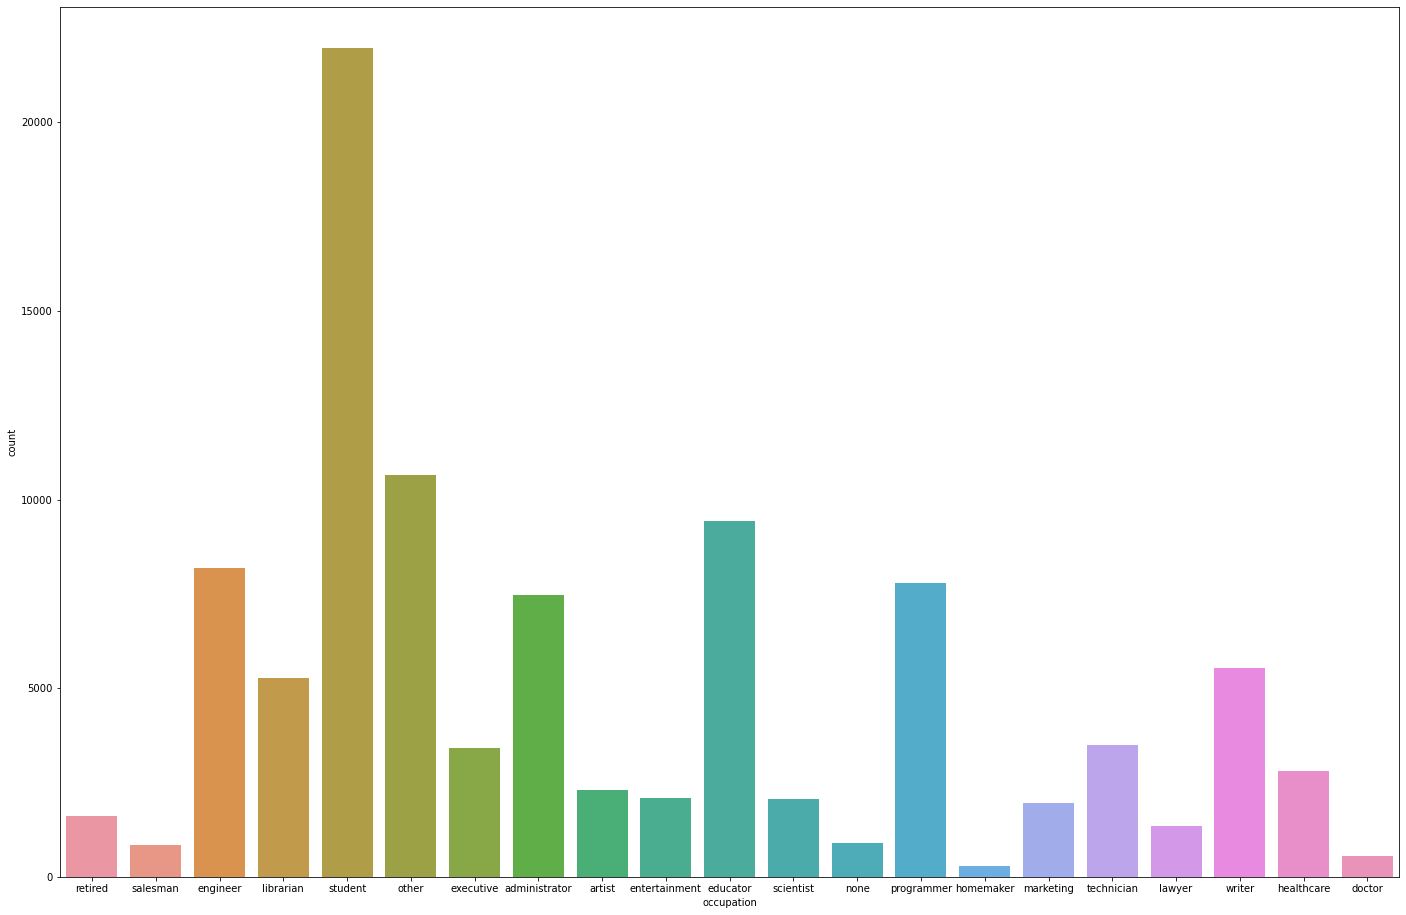

In [234]:
plt.figure(figsize=(24,16))
sns.countplot(merged_movie_user_df['occupation']);
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

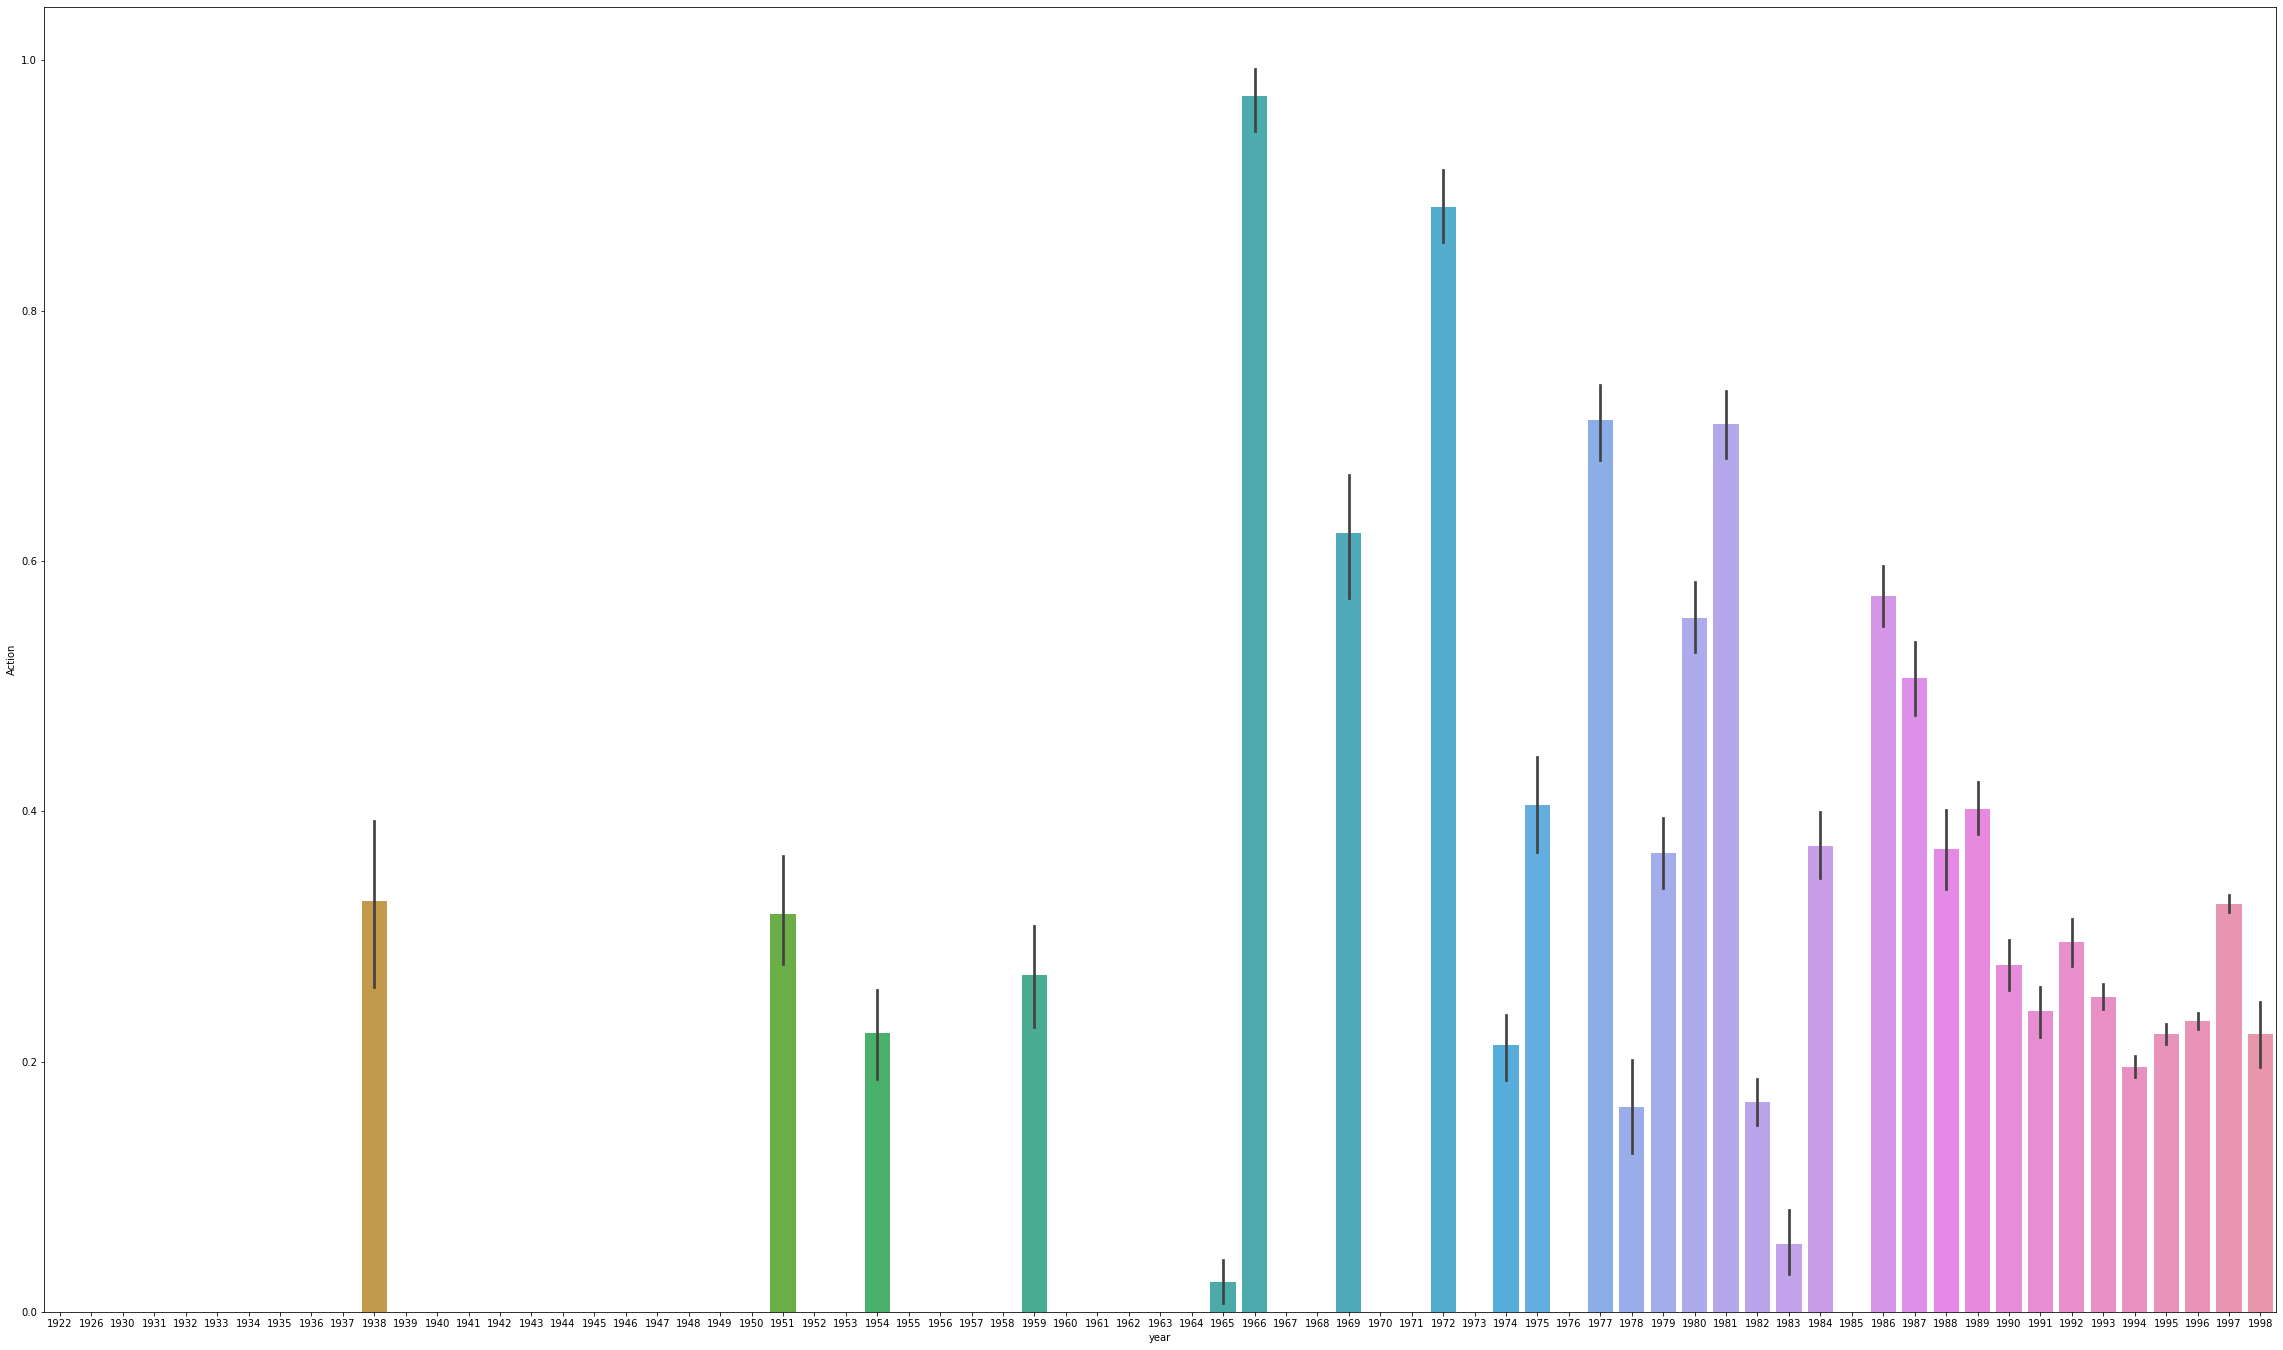

In [259]:
#Your answer here
plt.figure(figsize=(40,24))

# Action Genere over years
ax = sns.barplot(x='year', y='Action', data=merged_movie_user_df)
plt.show()

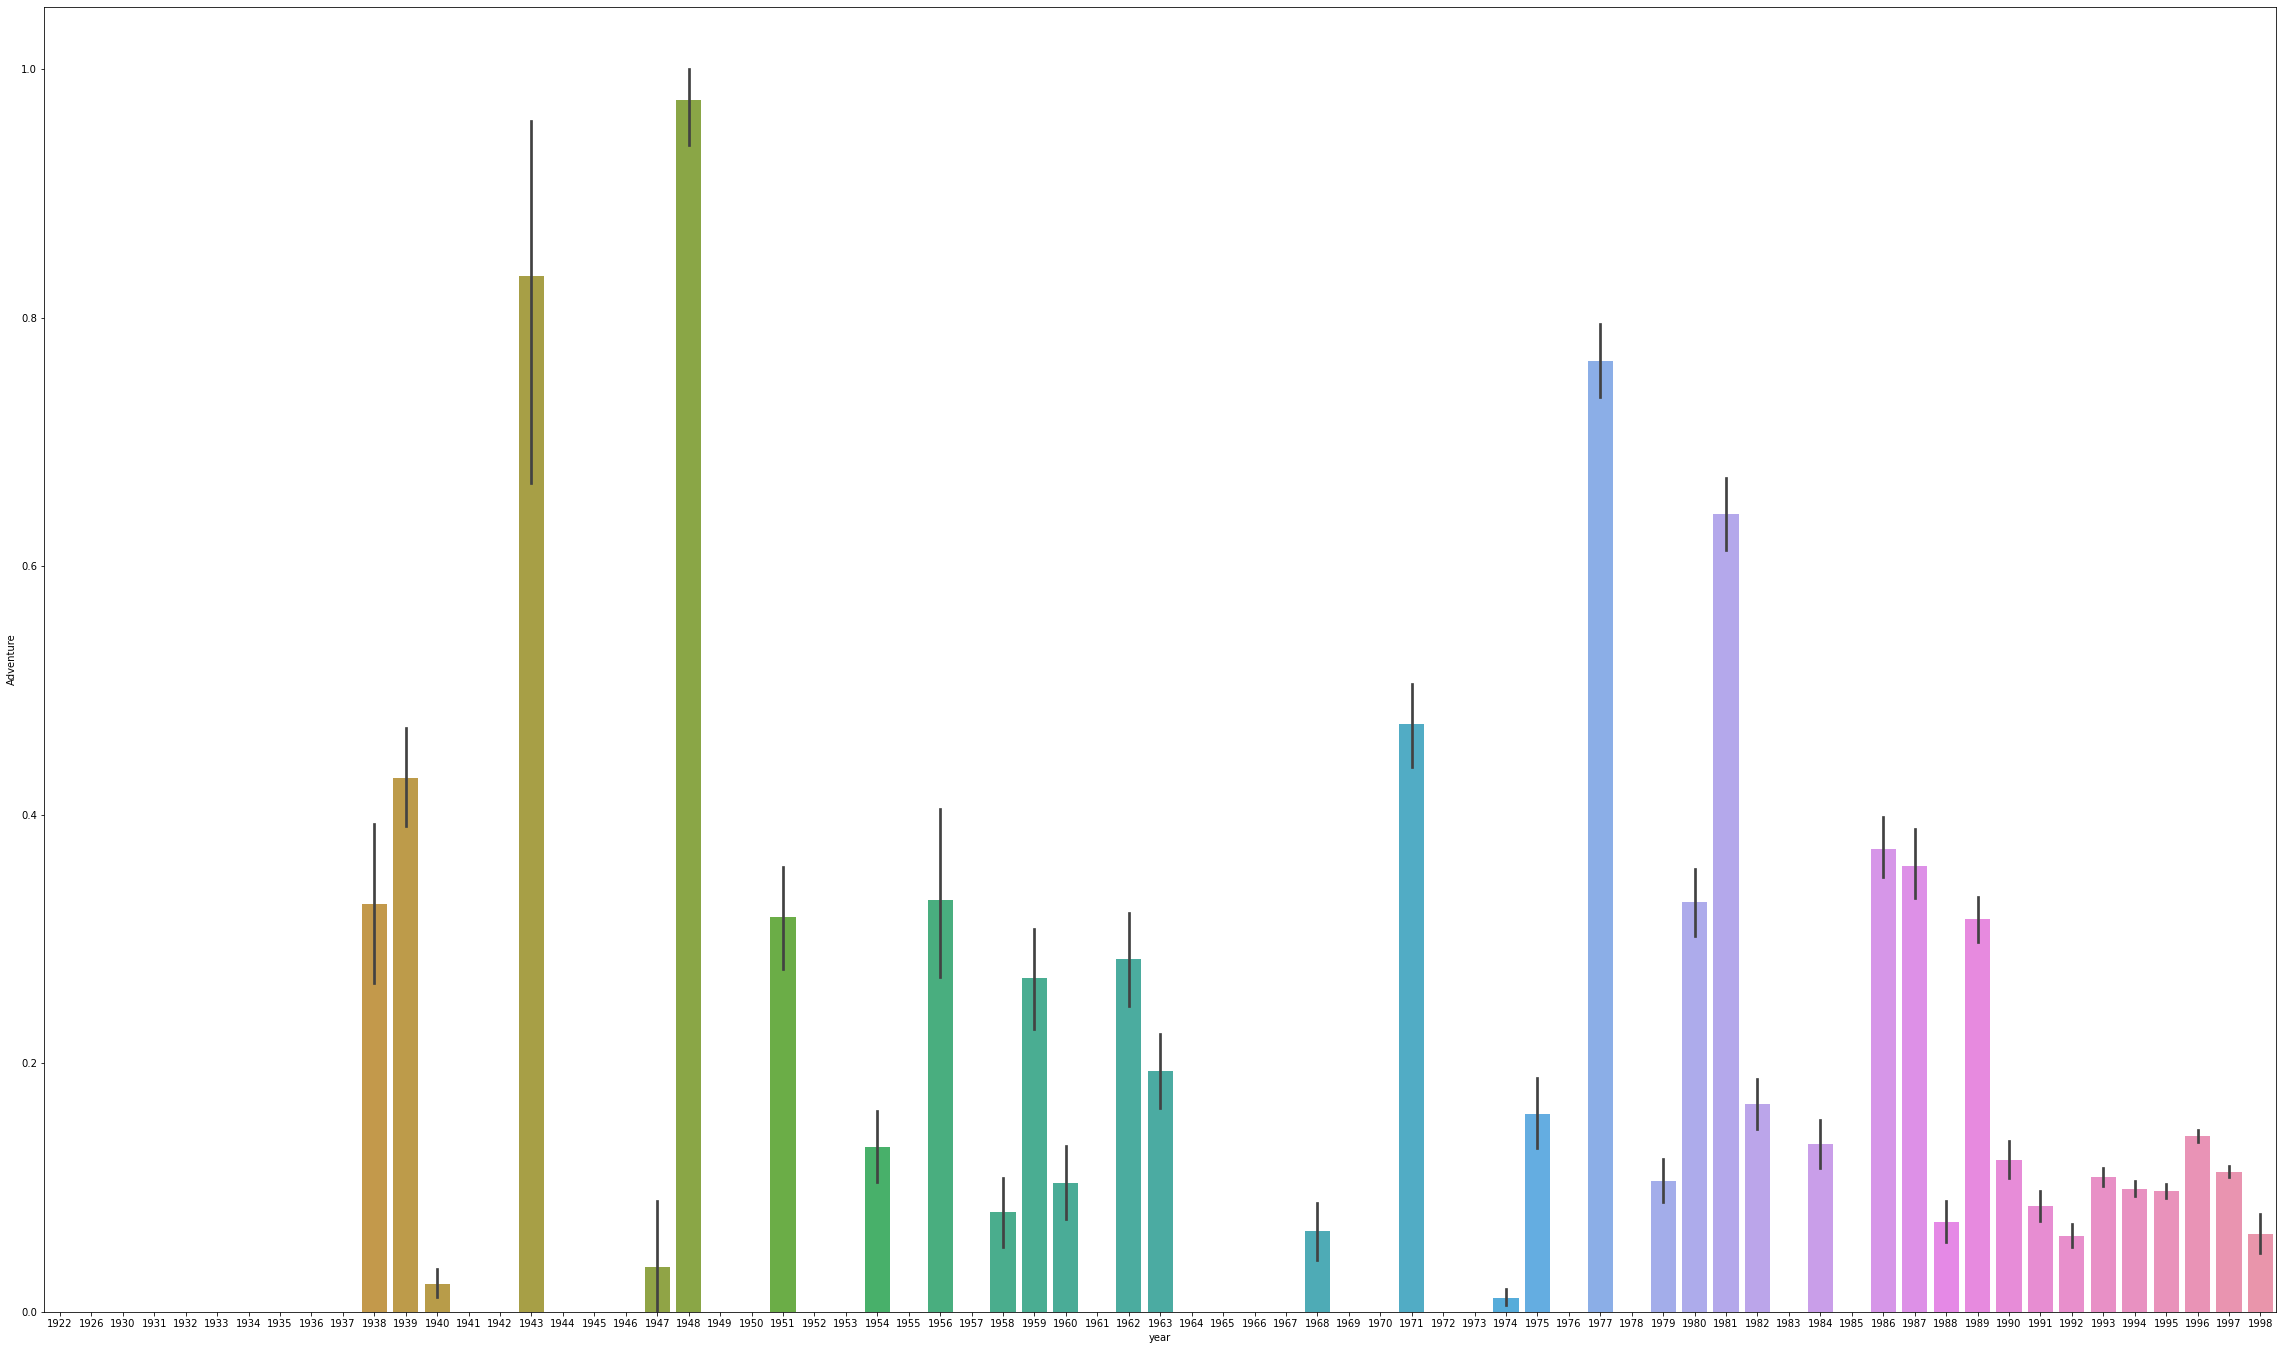

In [260]:
plt.figure(figsize=(40,24))

# Adventure Genere over years
ax = sns.barplot(x='year', y='Adventure', data=merged_movie_user_df)
plt.show()

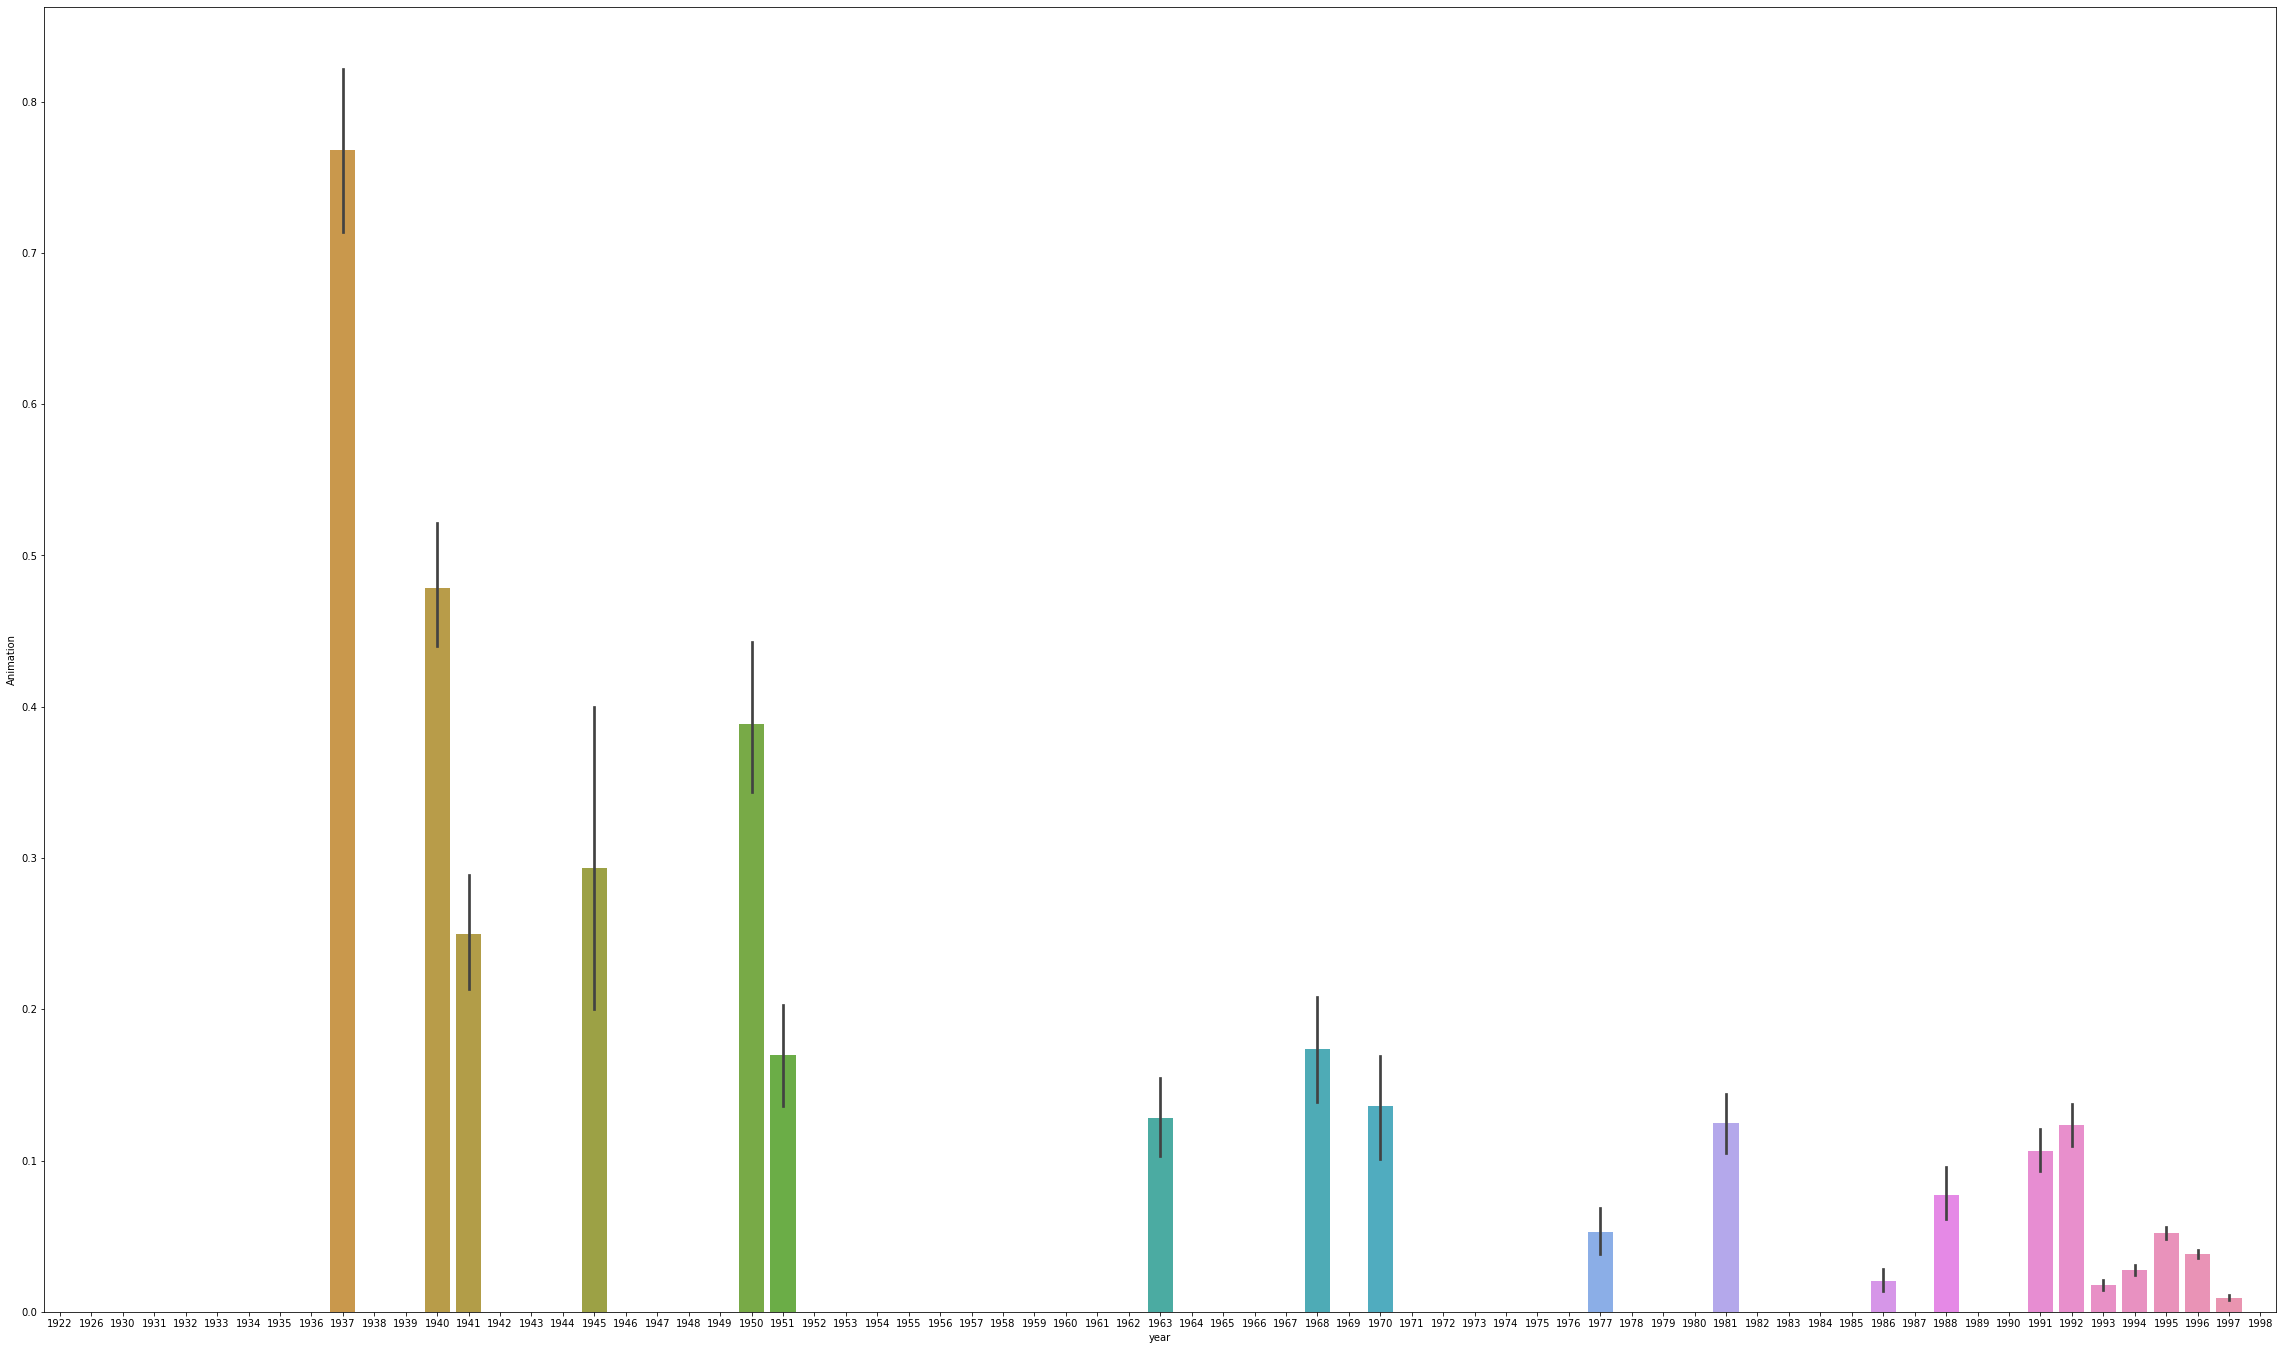

In [261]:
plt.figure(figsize=(40,24))
# Animation Genere over years
ax = sns.barplot(x='year', y='Animation', data=merged_movie_user_df)
plt.show()

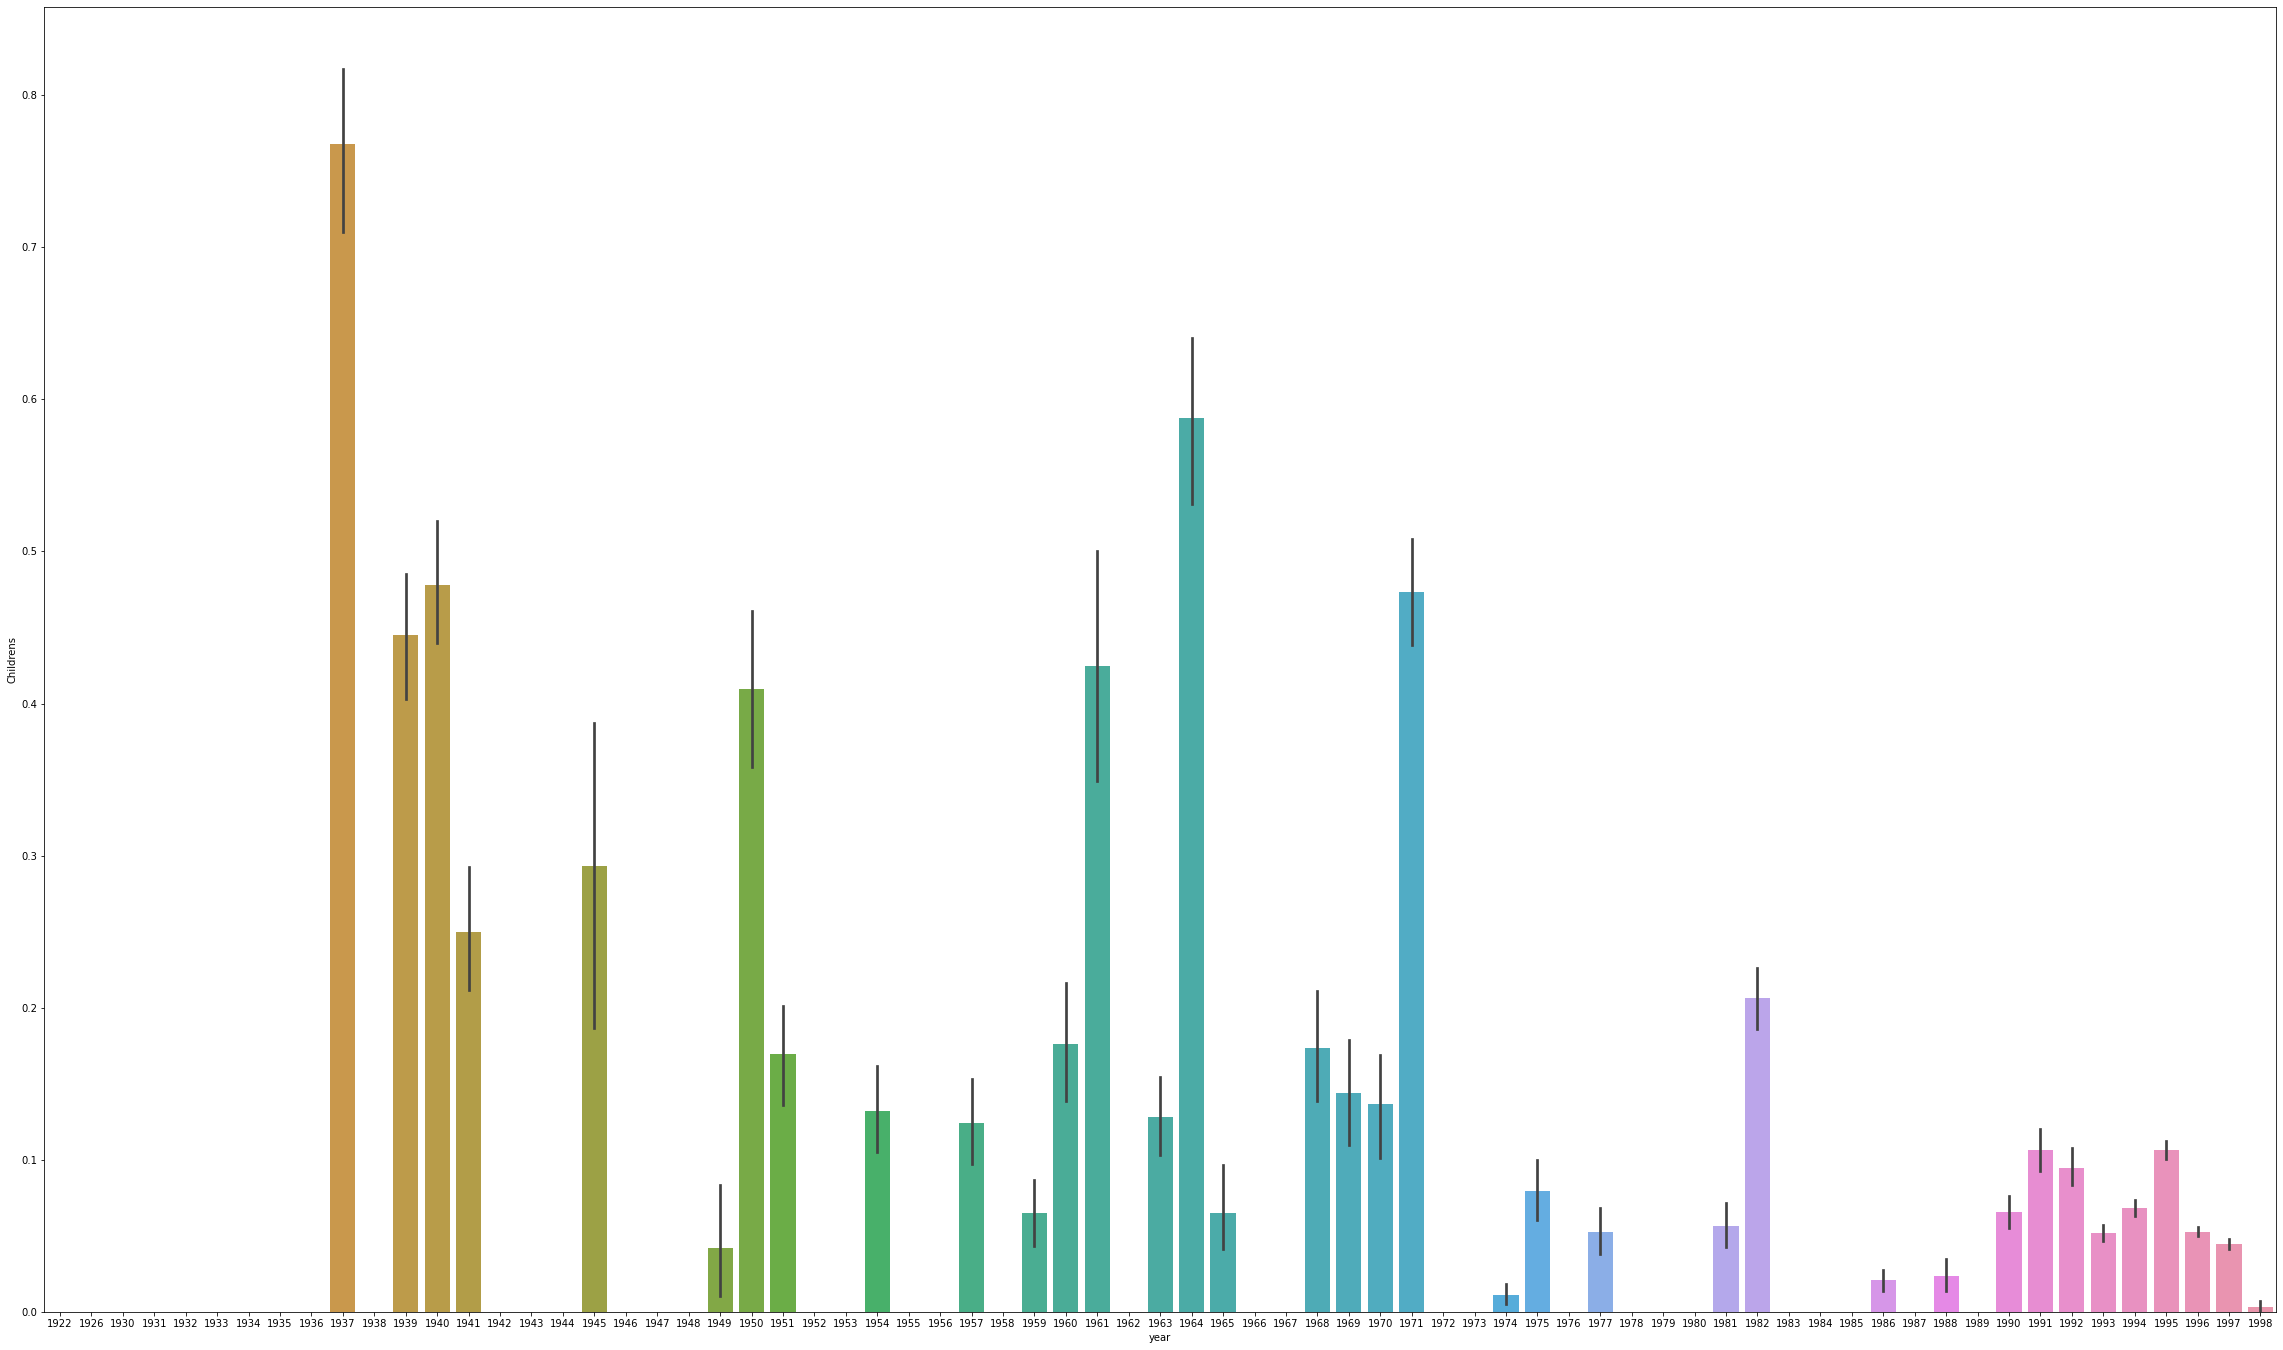

In [263]:
plt.figure(figsize=(40,24))
# Childrens Genere over years
ax = sns.barplot(x='year', y='Childrens', data=merged_movie_user_df)
plt.show()

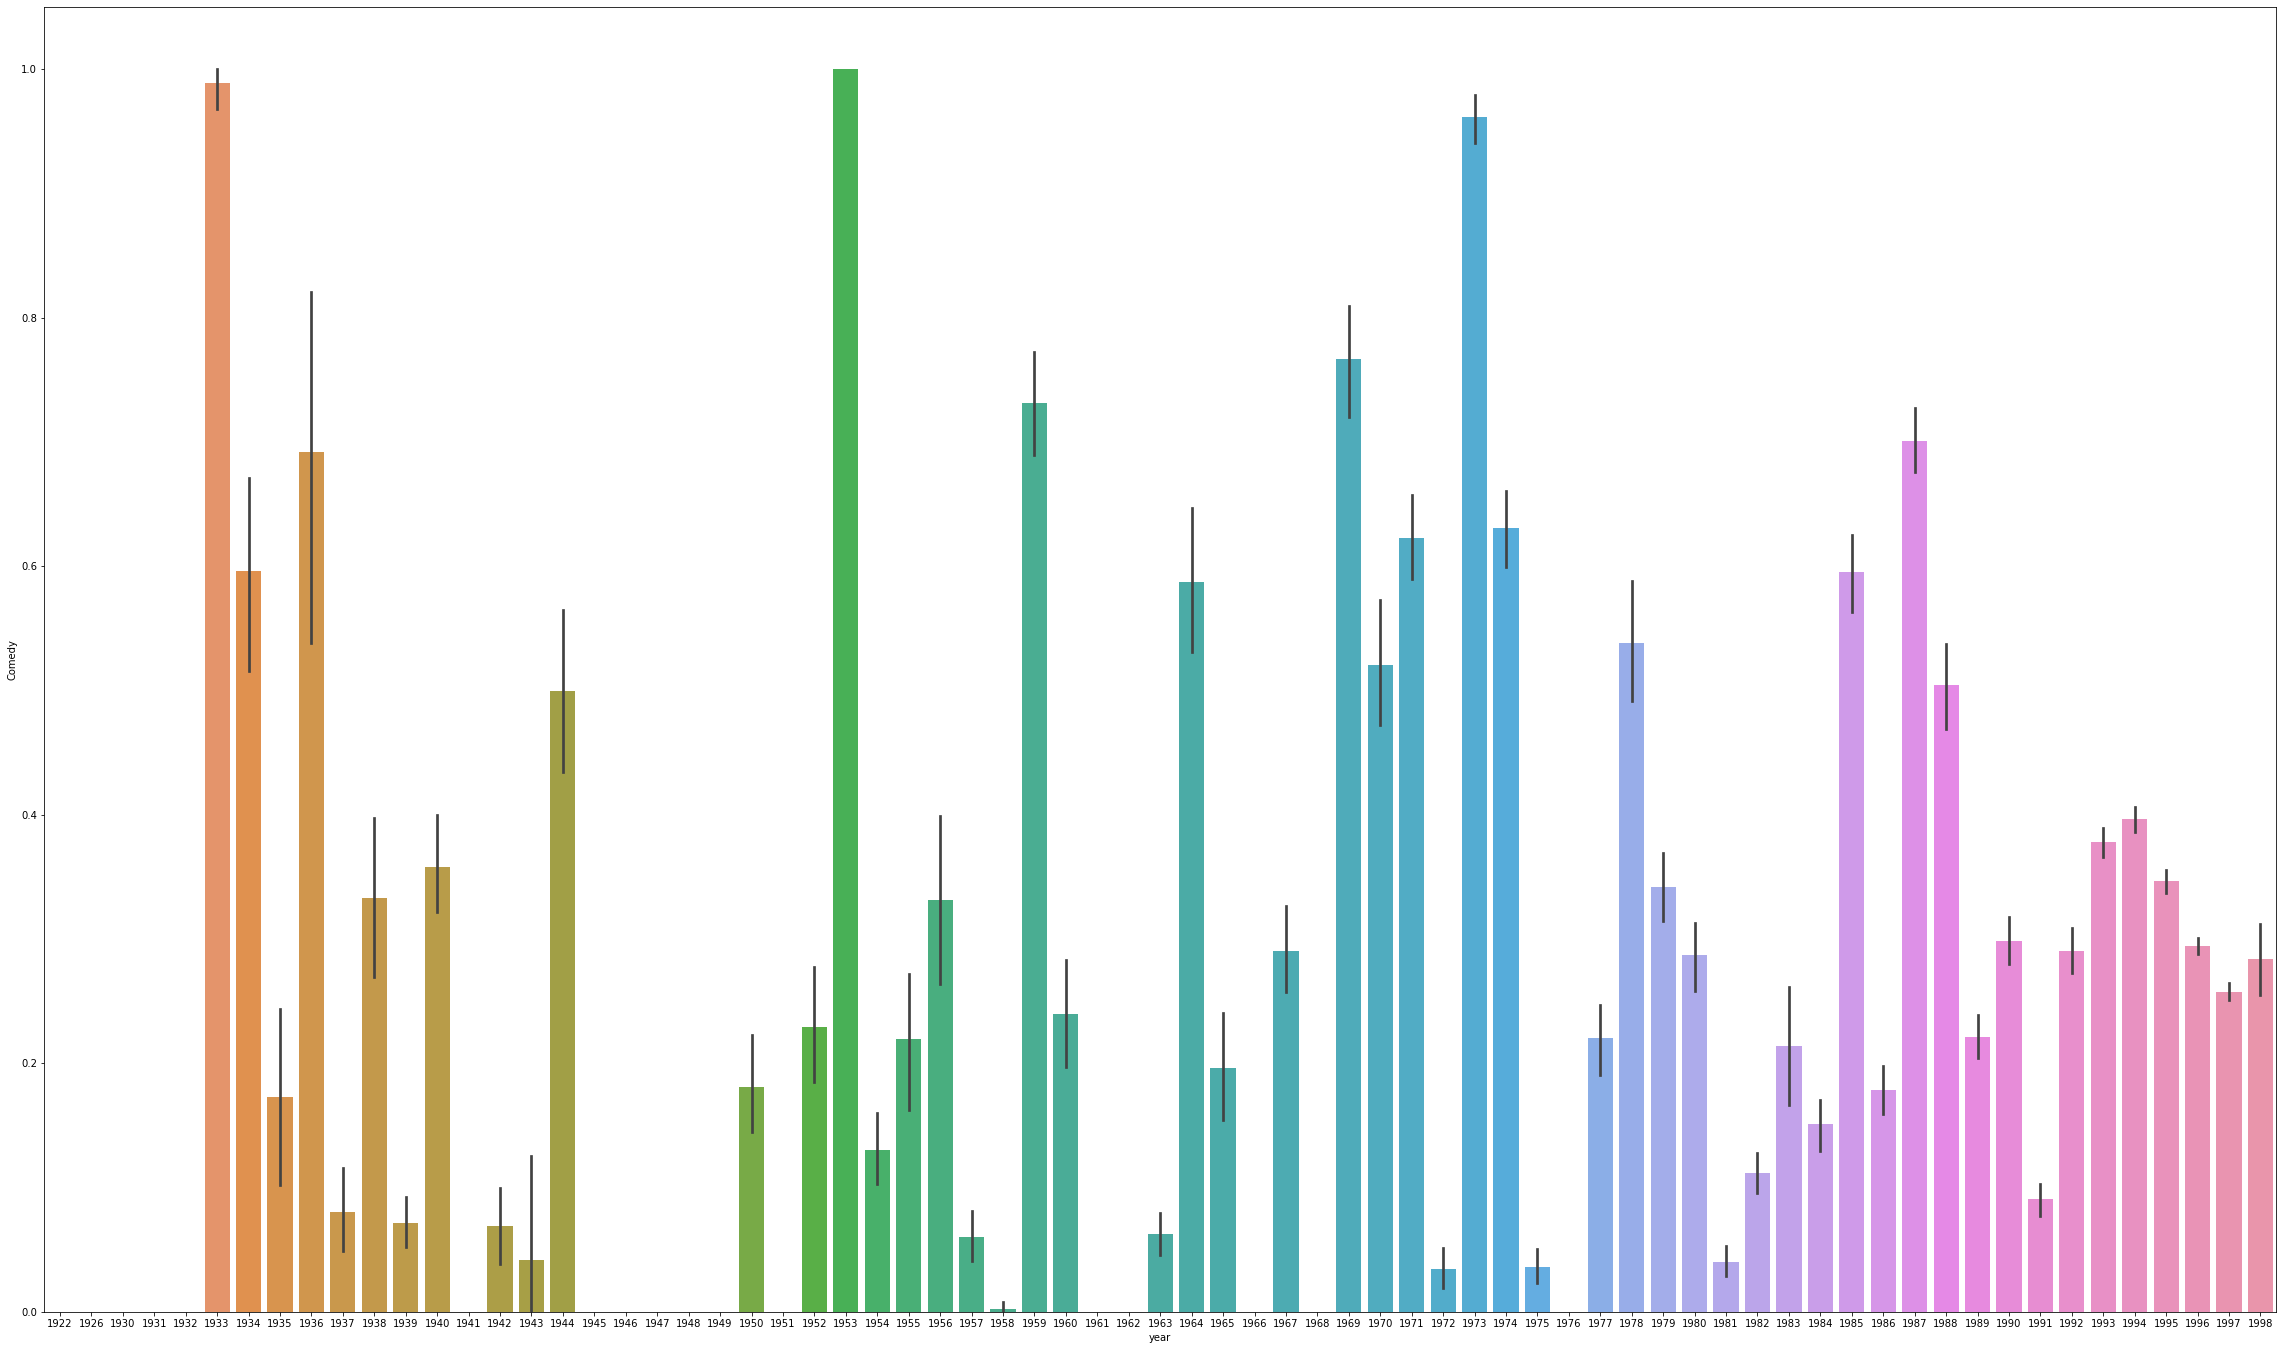

In [265]:
plt.figure(figsize=(40,24))
# Comedy Genere over years
ax = sns.barplot(x='year', y='Comedy', data=merged_movie_user_df)
plt.show()

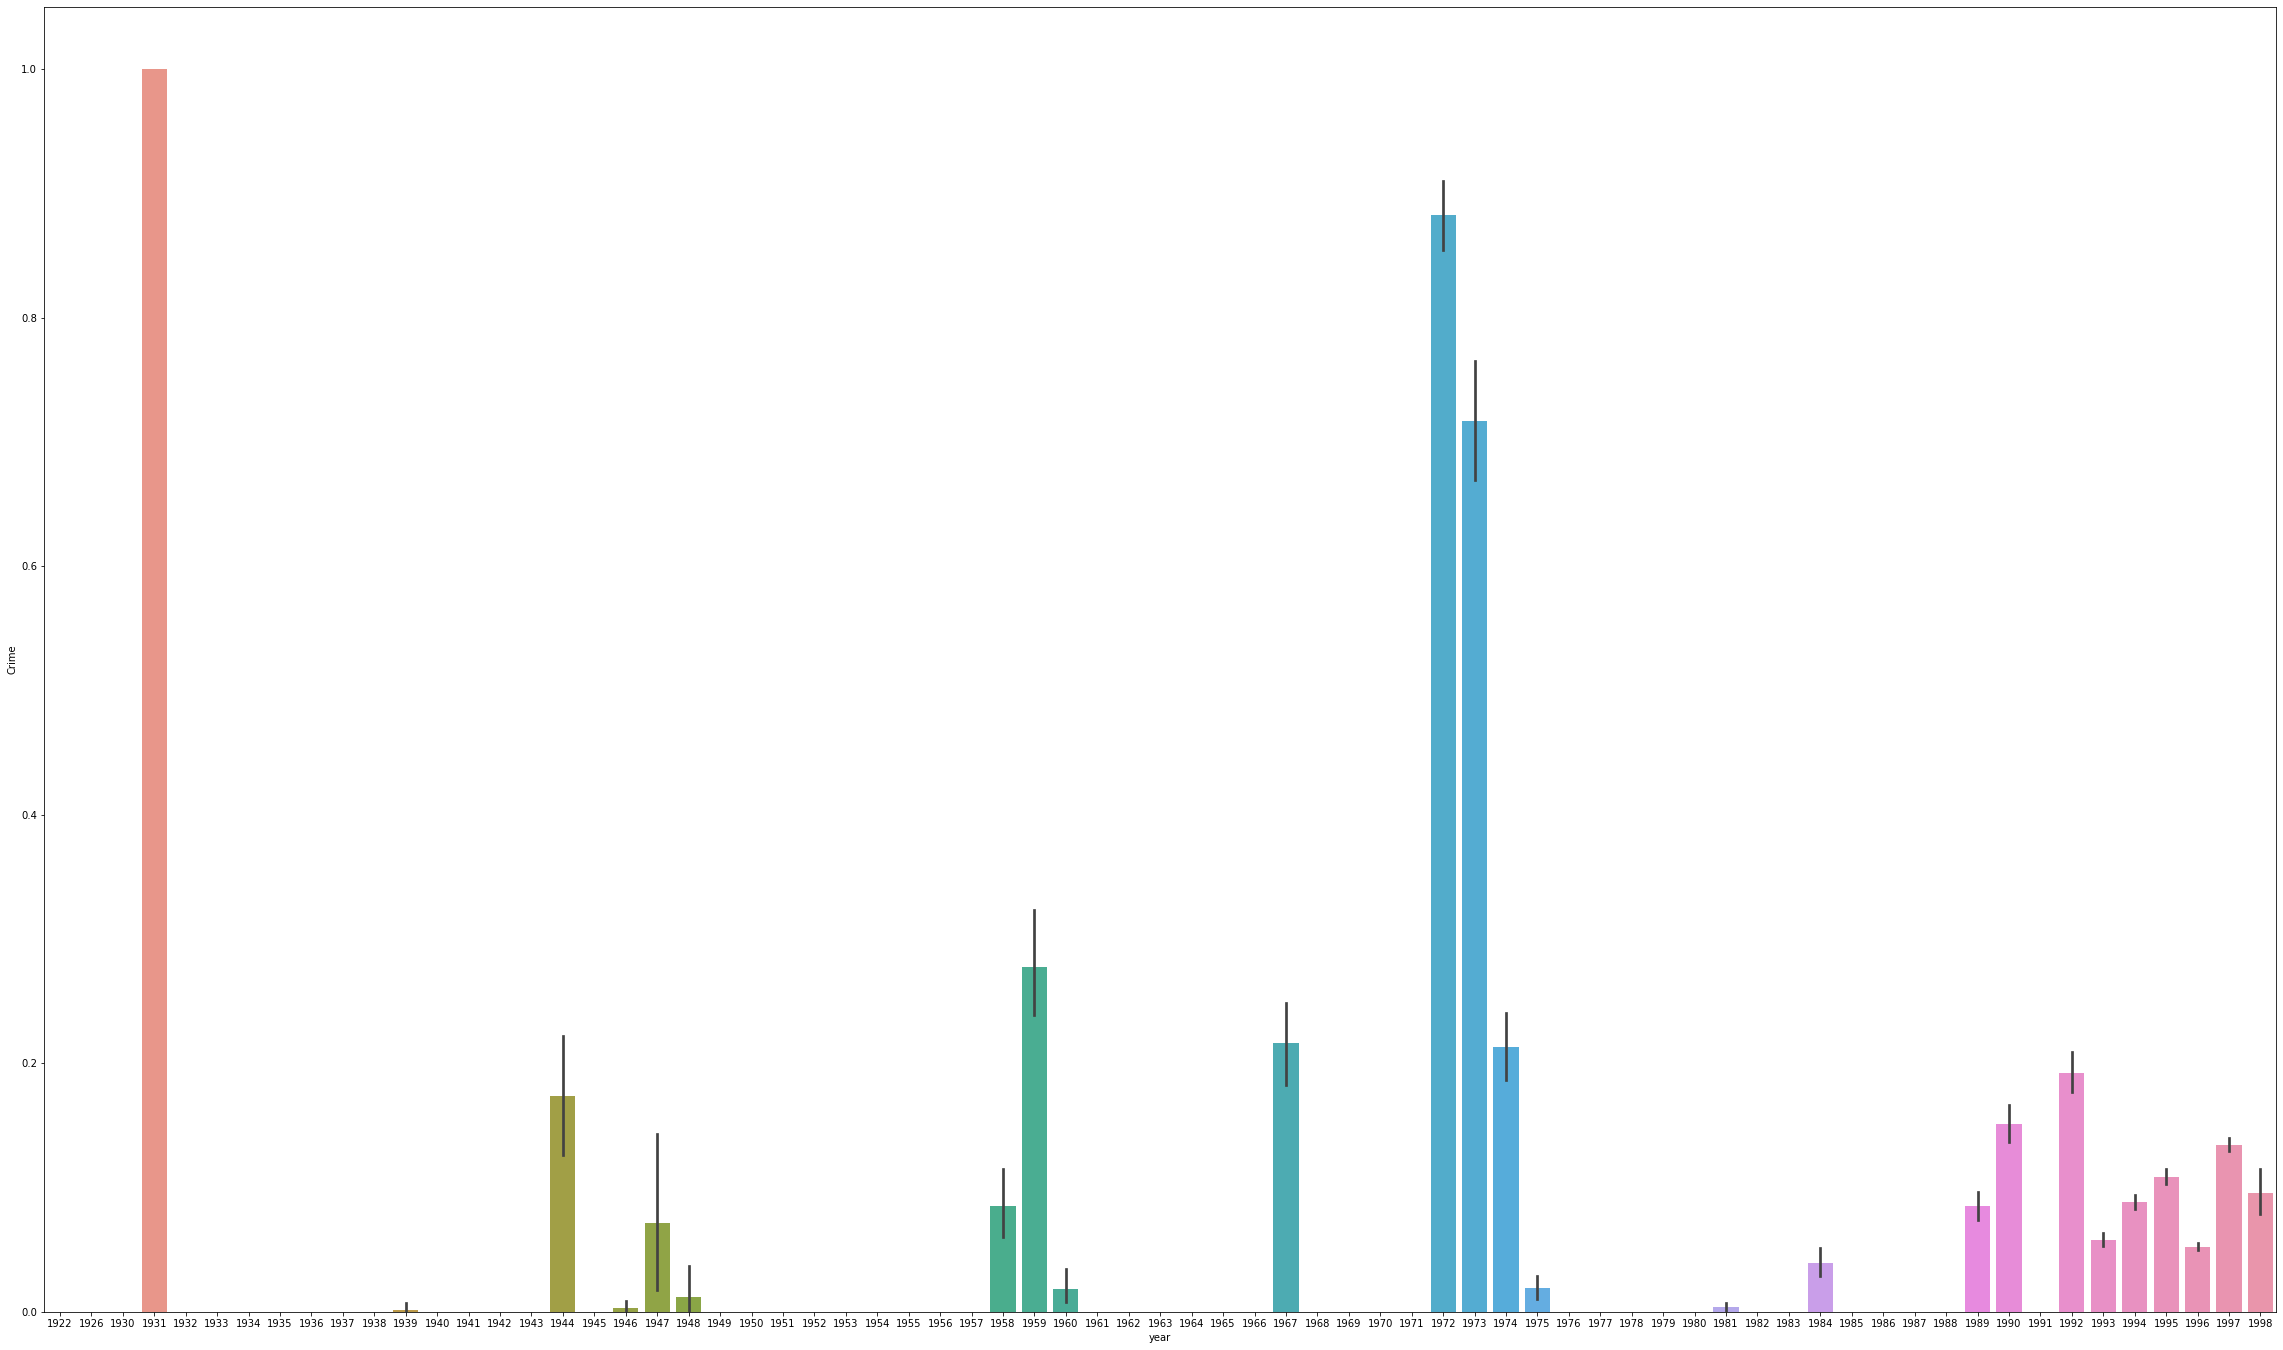

In [266]:
plt.figure(figsize=(40,24))
# Crime Genere over years
ax = sns.barplot(x='year', y='Crime', data=merged_movie_user_df)
plt.show()

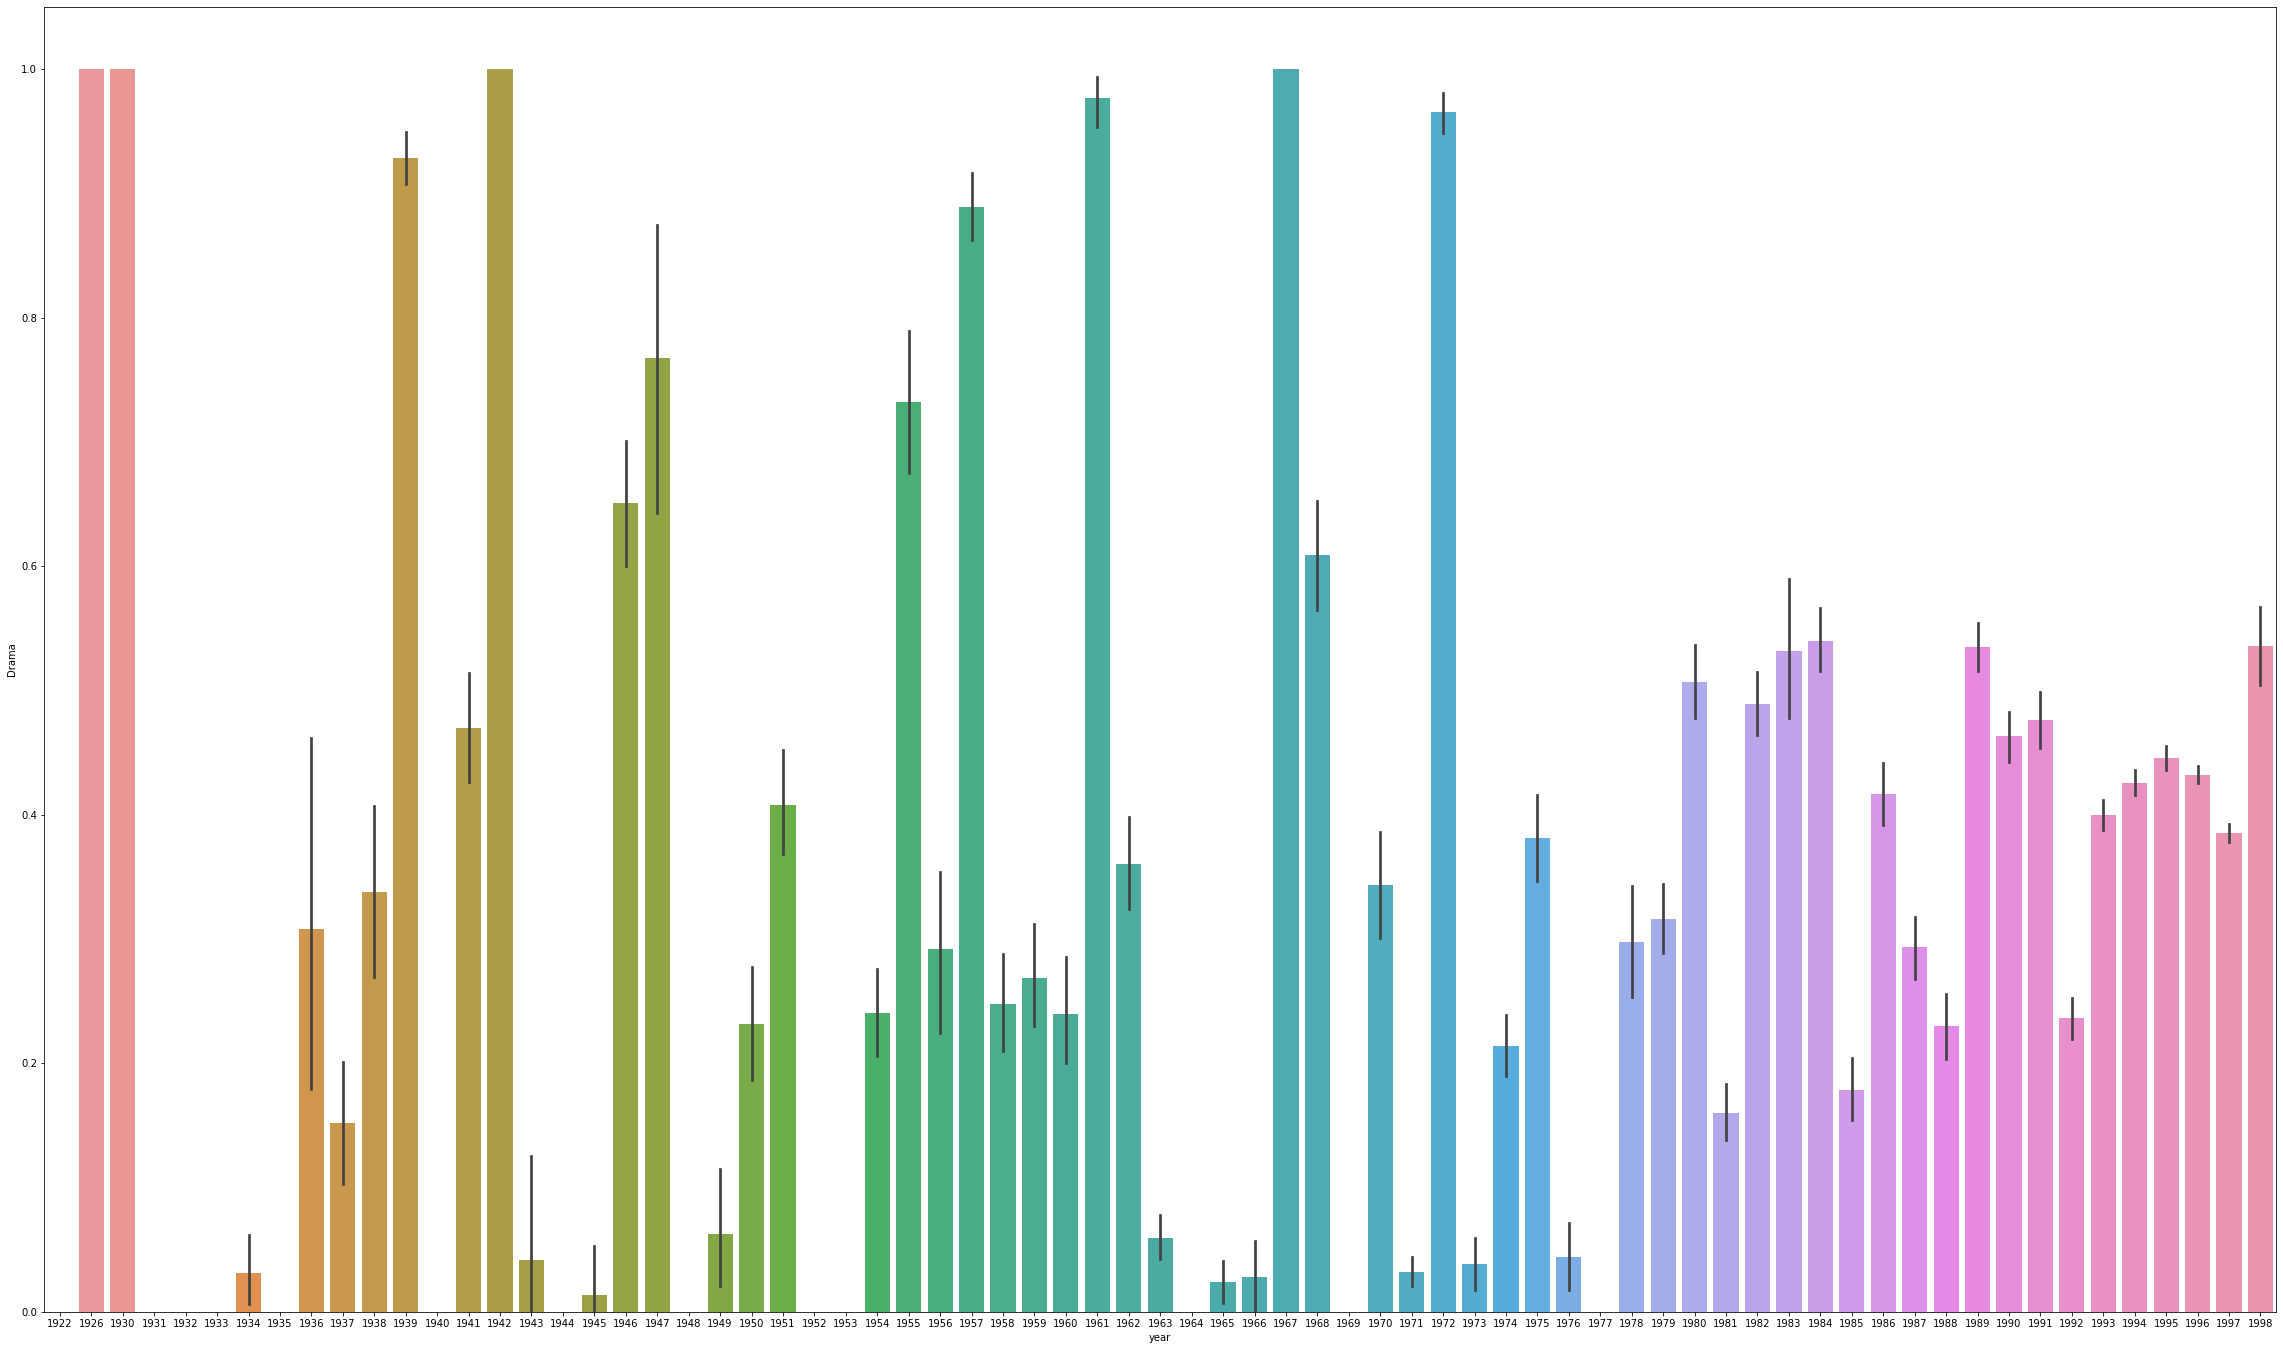

In [267]:
plt.figure(figsize=(40,24))
# Drama Genere over years
ax = sns.barplot(x='year', y='Drama', data=merged_movie_user_df)
plt.show()

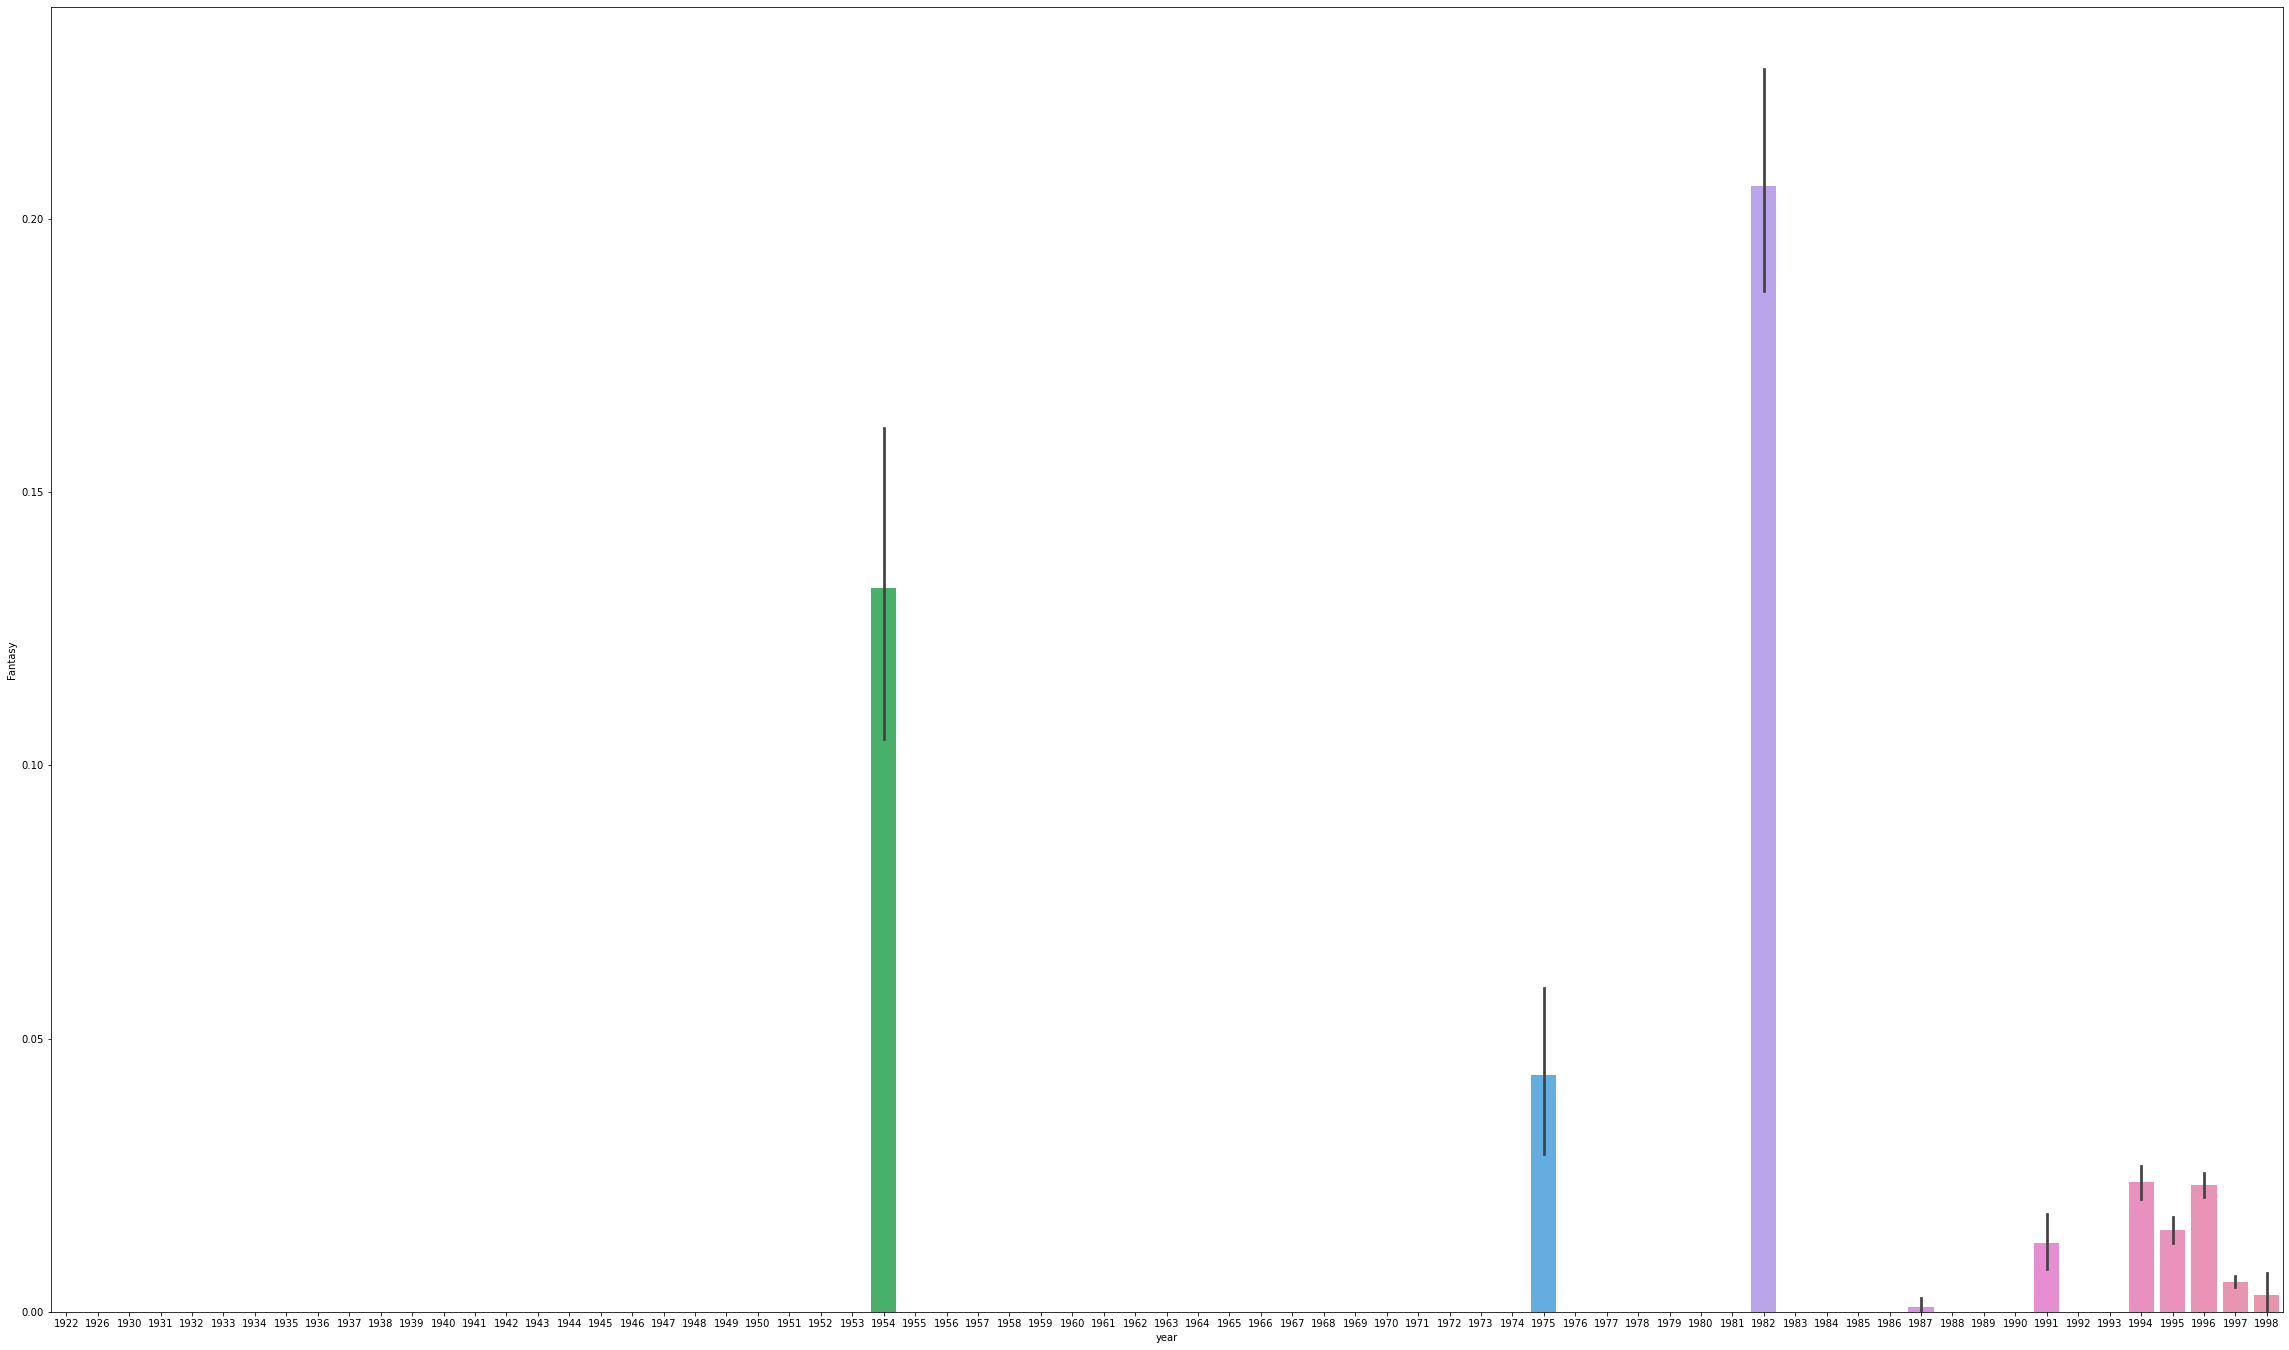

In [268]:
plt.figure(figsize=(40,24))
# Fantasy Genere over years
ax = sns.barplot(x='year', y='Fantasy', data=merged_movie_user_df)
plt.show()

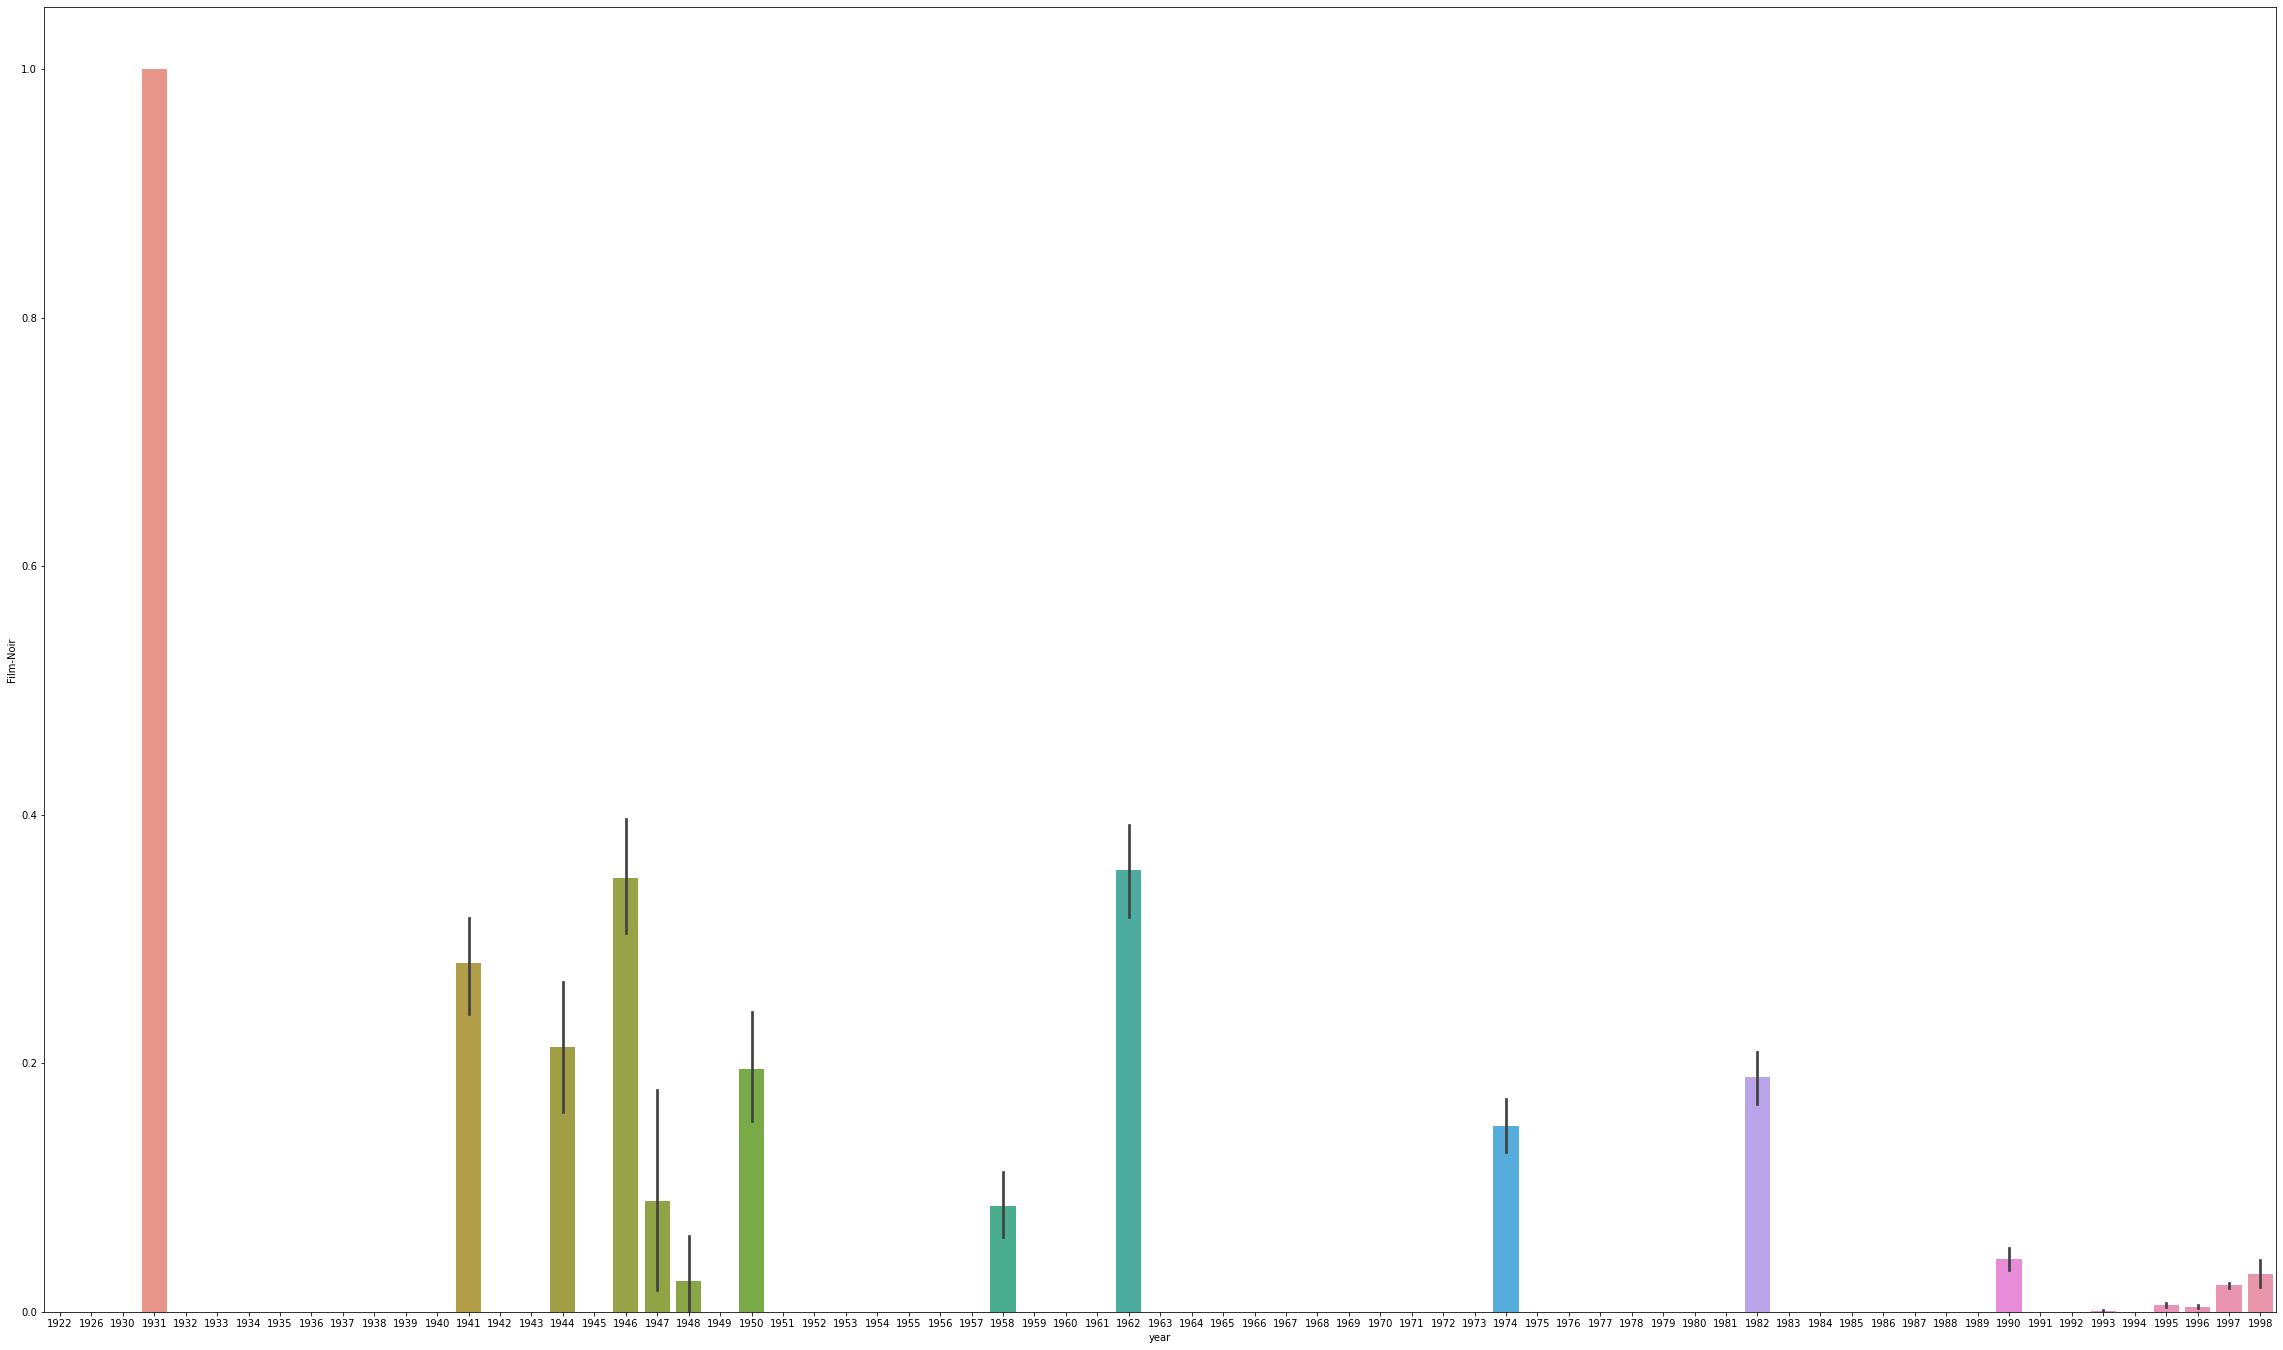

In [269]:
plt.figure(figsize=(40,24))
# Film-Noir Genere over years
ax = sns.barplot(x='year', y='Film-Noir', data=merged_movie_user_df)
plt.show()

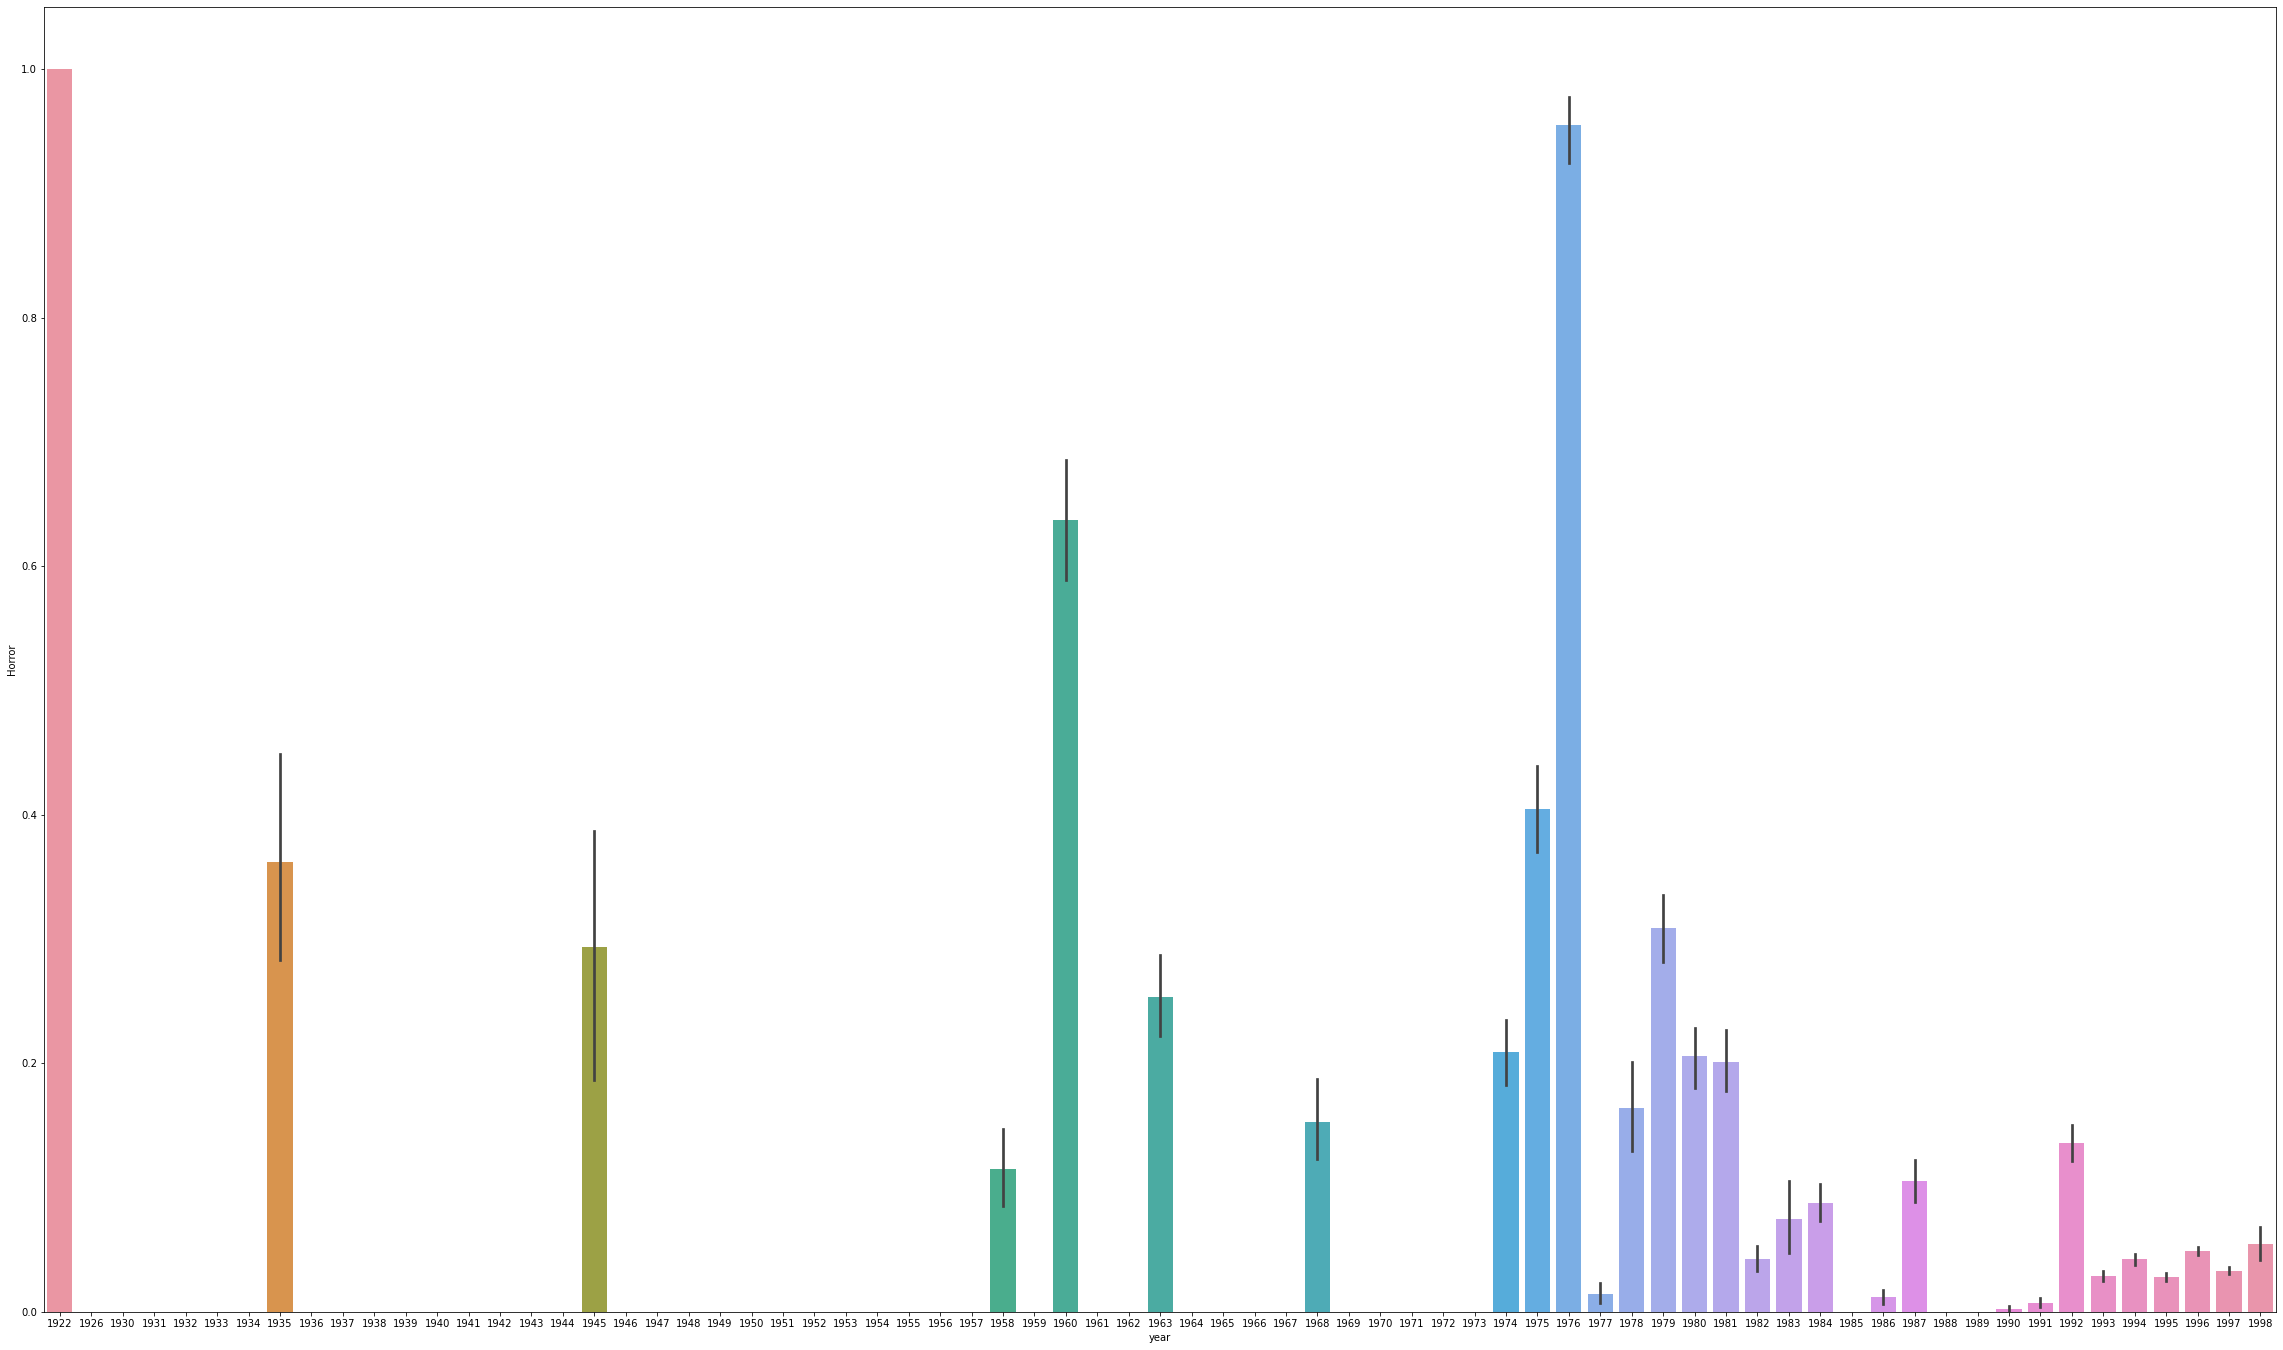

In [270]:
plt.figure(figsize=(40,24))
# Horror Genere over years
ax = sns.barplot(x='year', y='Horror', data=merged_movie_user_df)
plt.show()

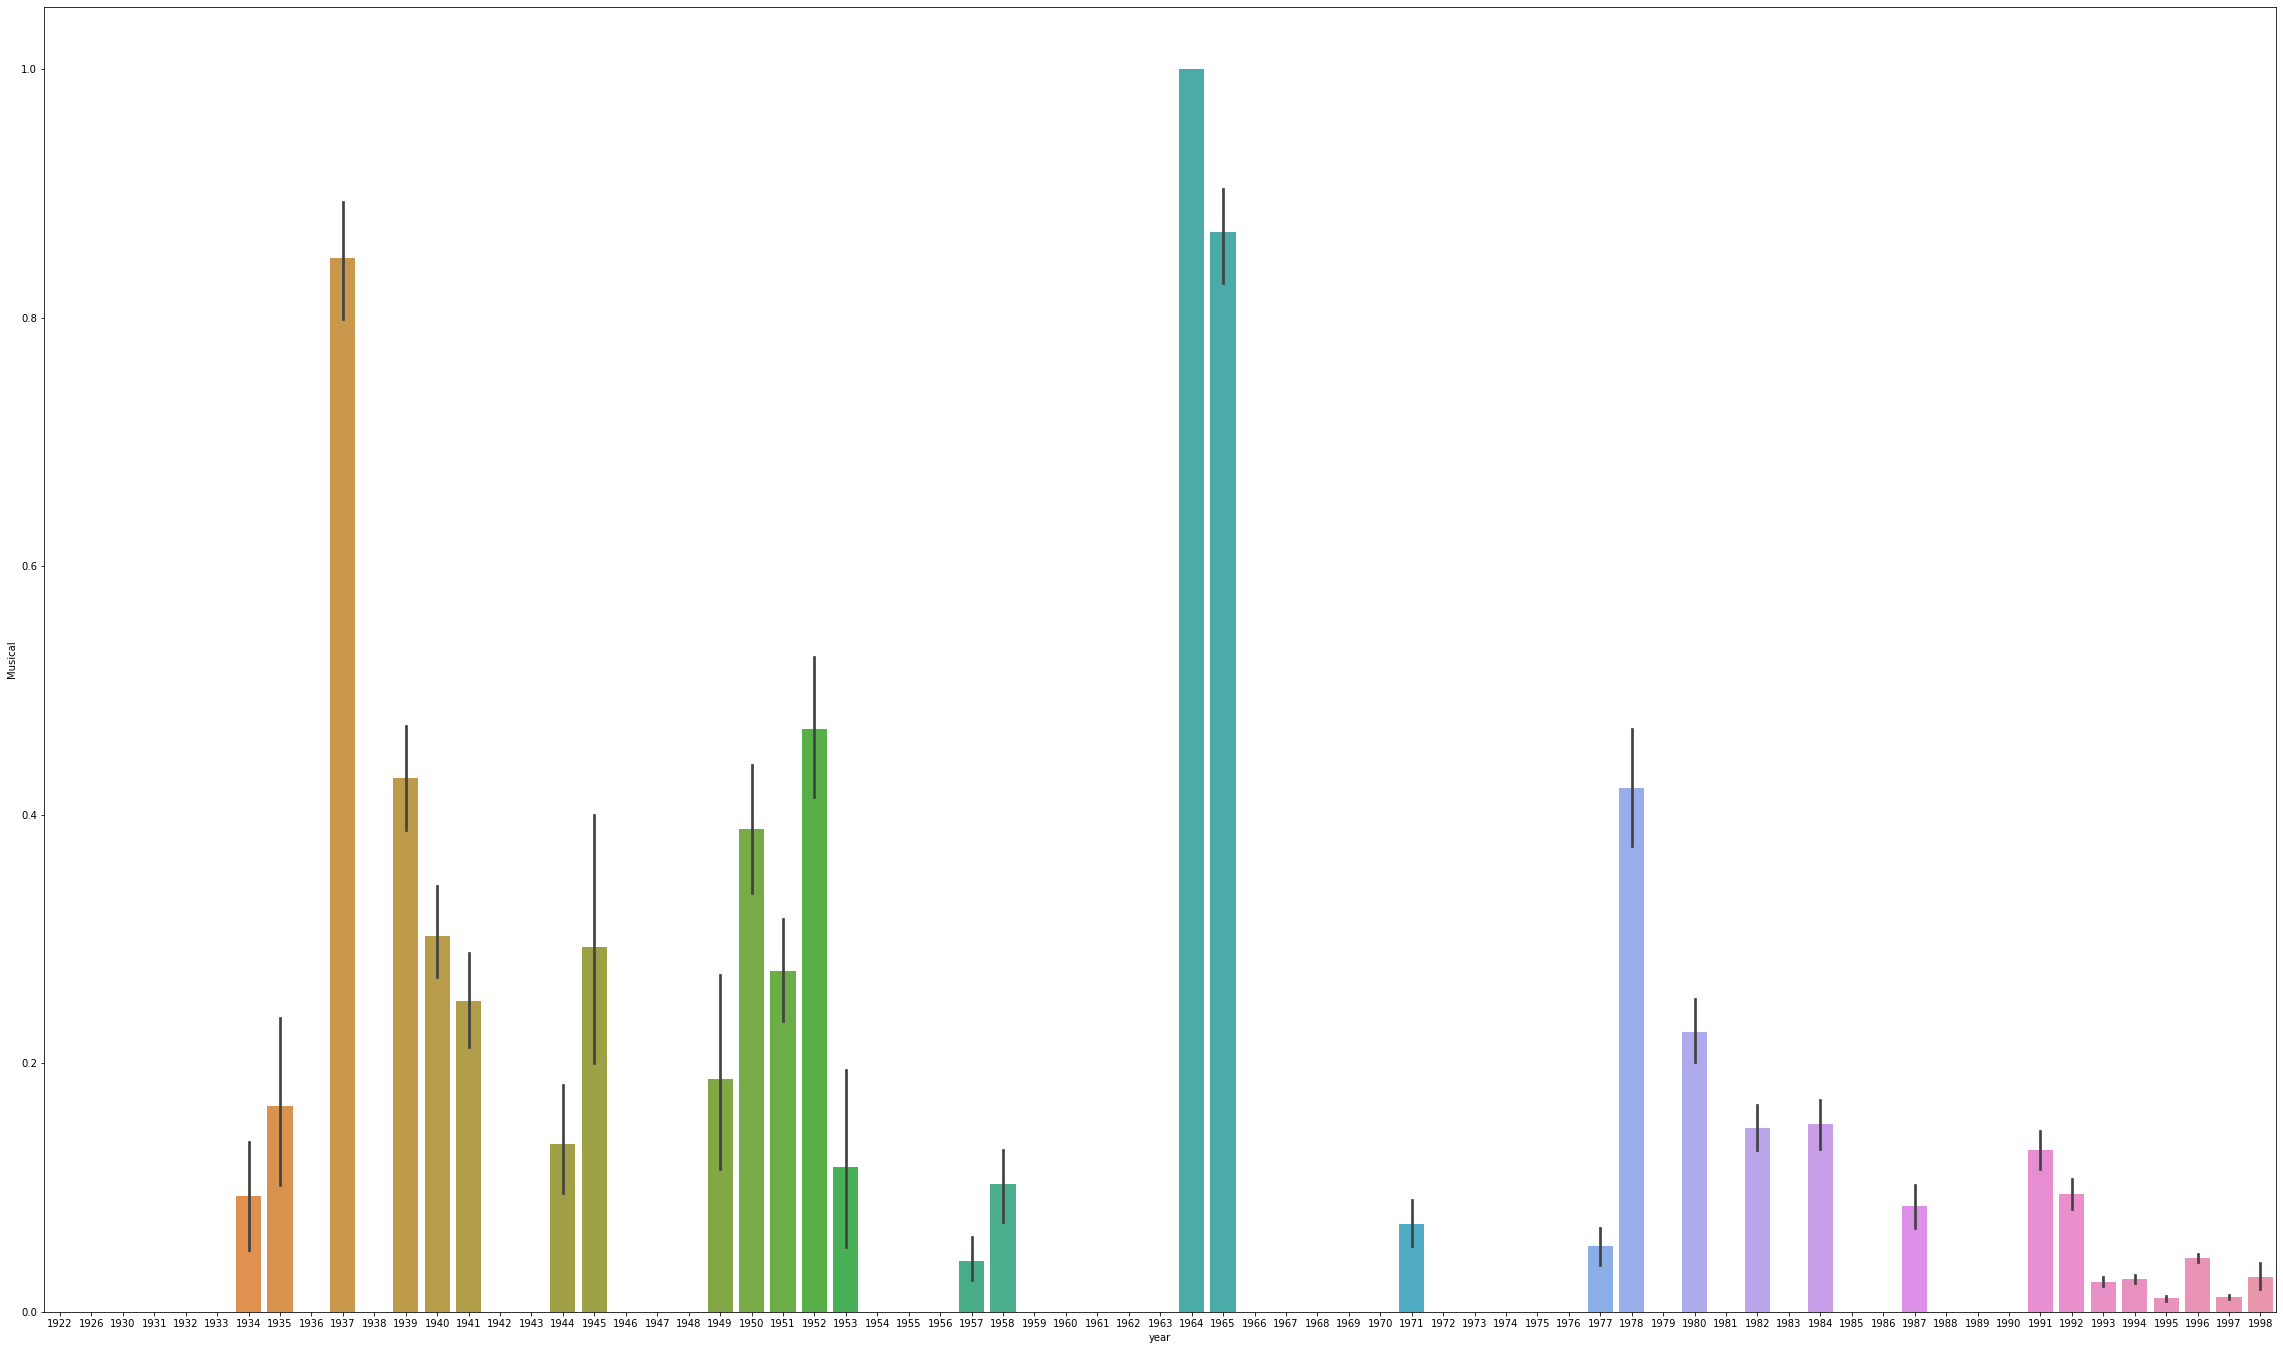

In [271]:
plt.figure(figsize=(40,24))
# Musical Genere over years
ax = sns.barplot(x='year', y='Musical', data=merged_movie_user_df)
plt.show()

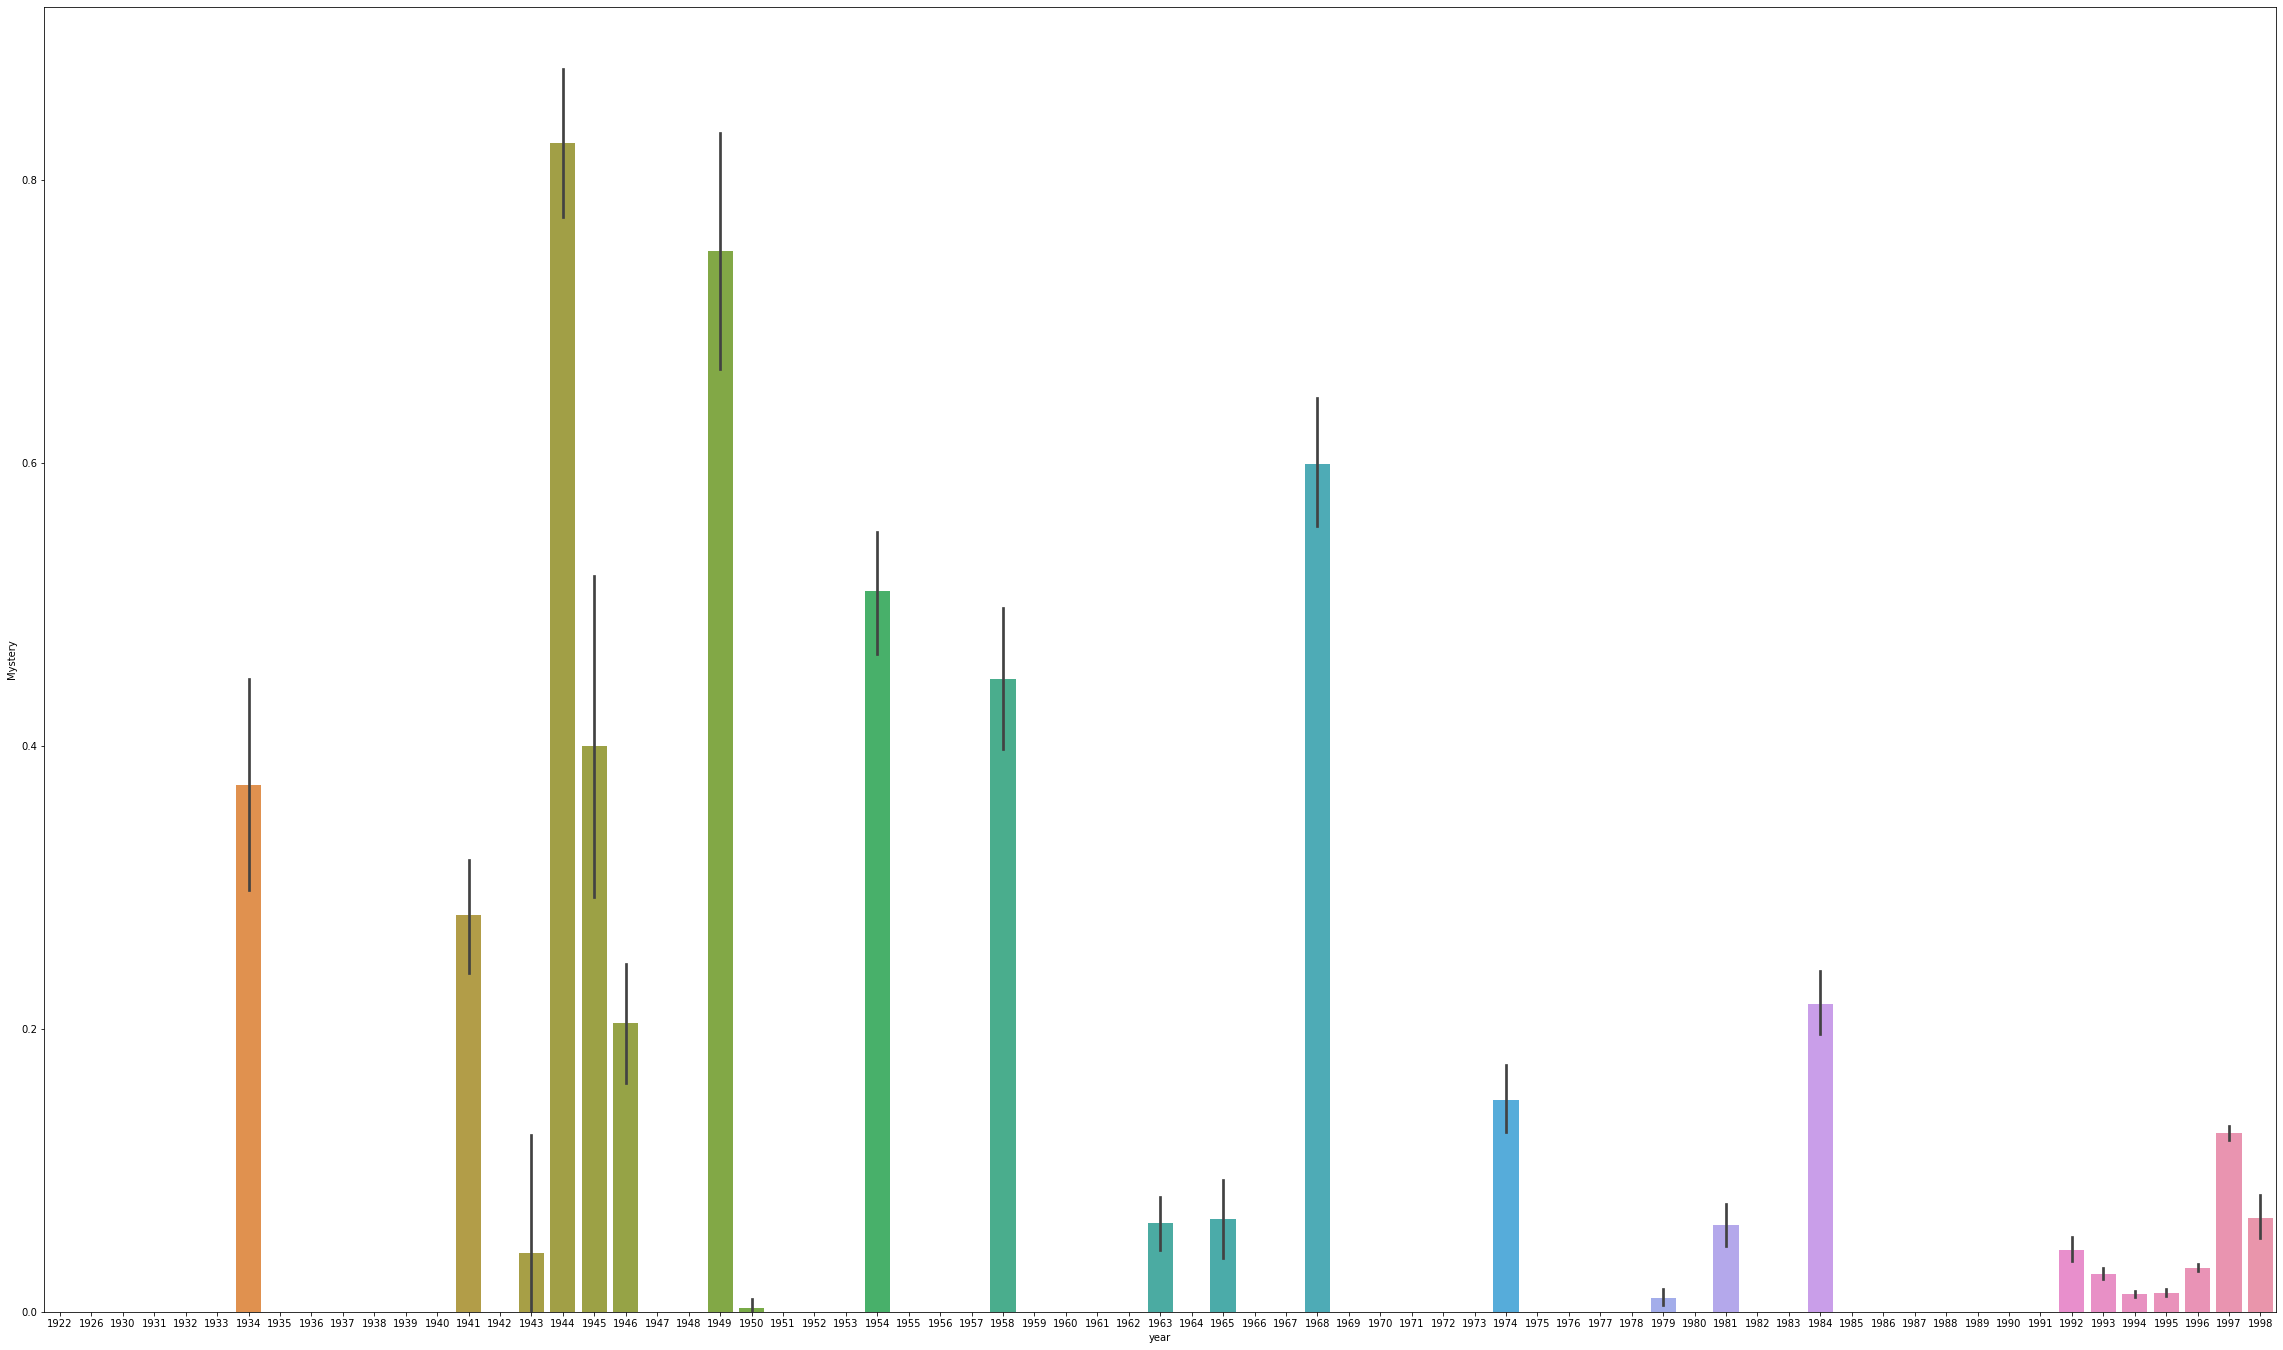

In [272]:
plt.figure(figsize=(40,24))
# Mystery Genere over years
ax = sns.barplot(x='year', y='Mystery', data=merged_movie_user_df)
plt.show()

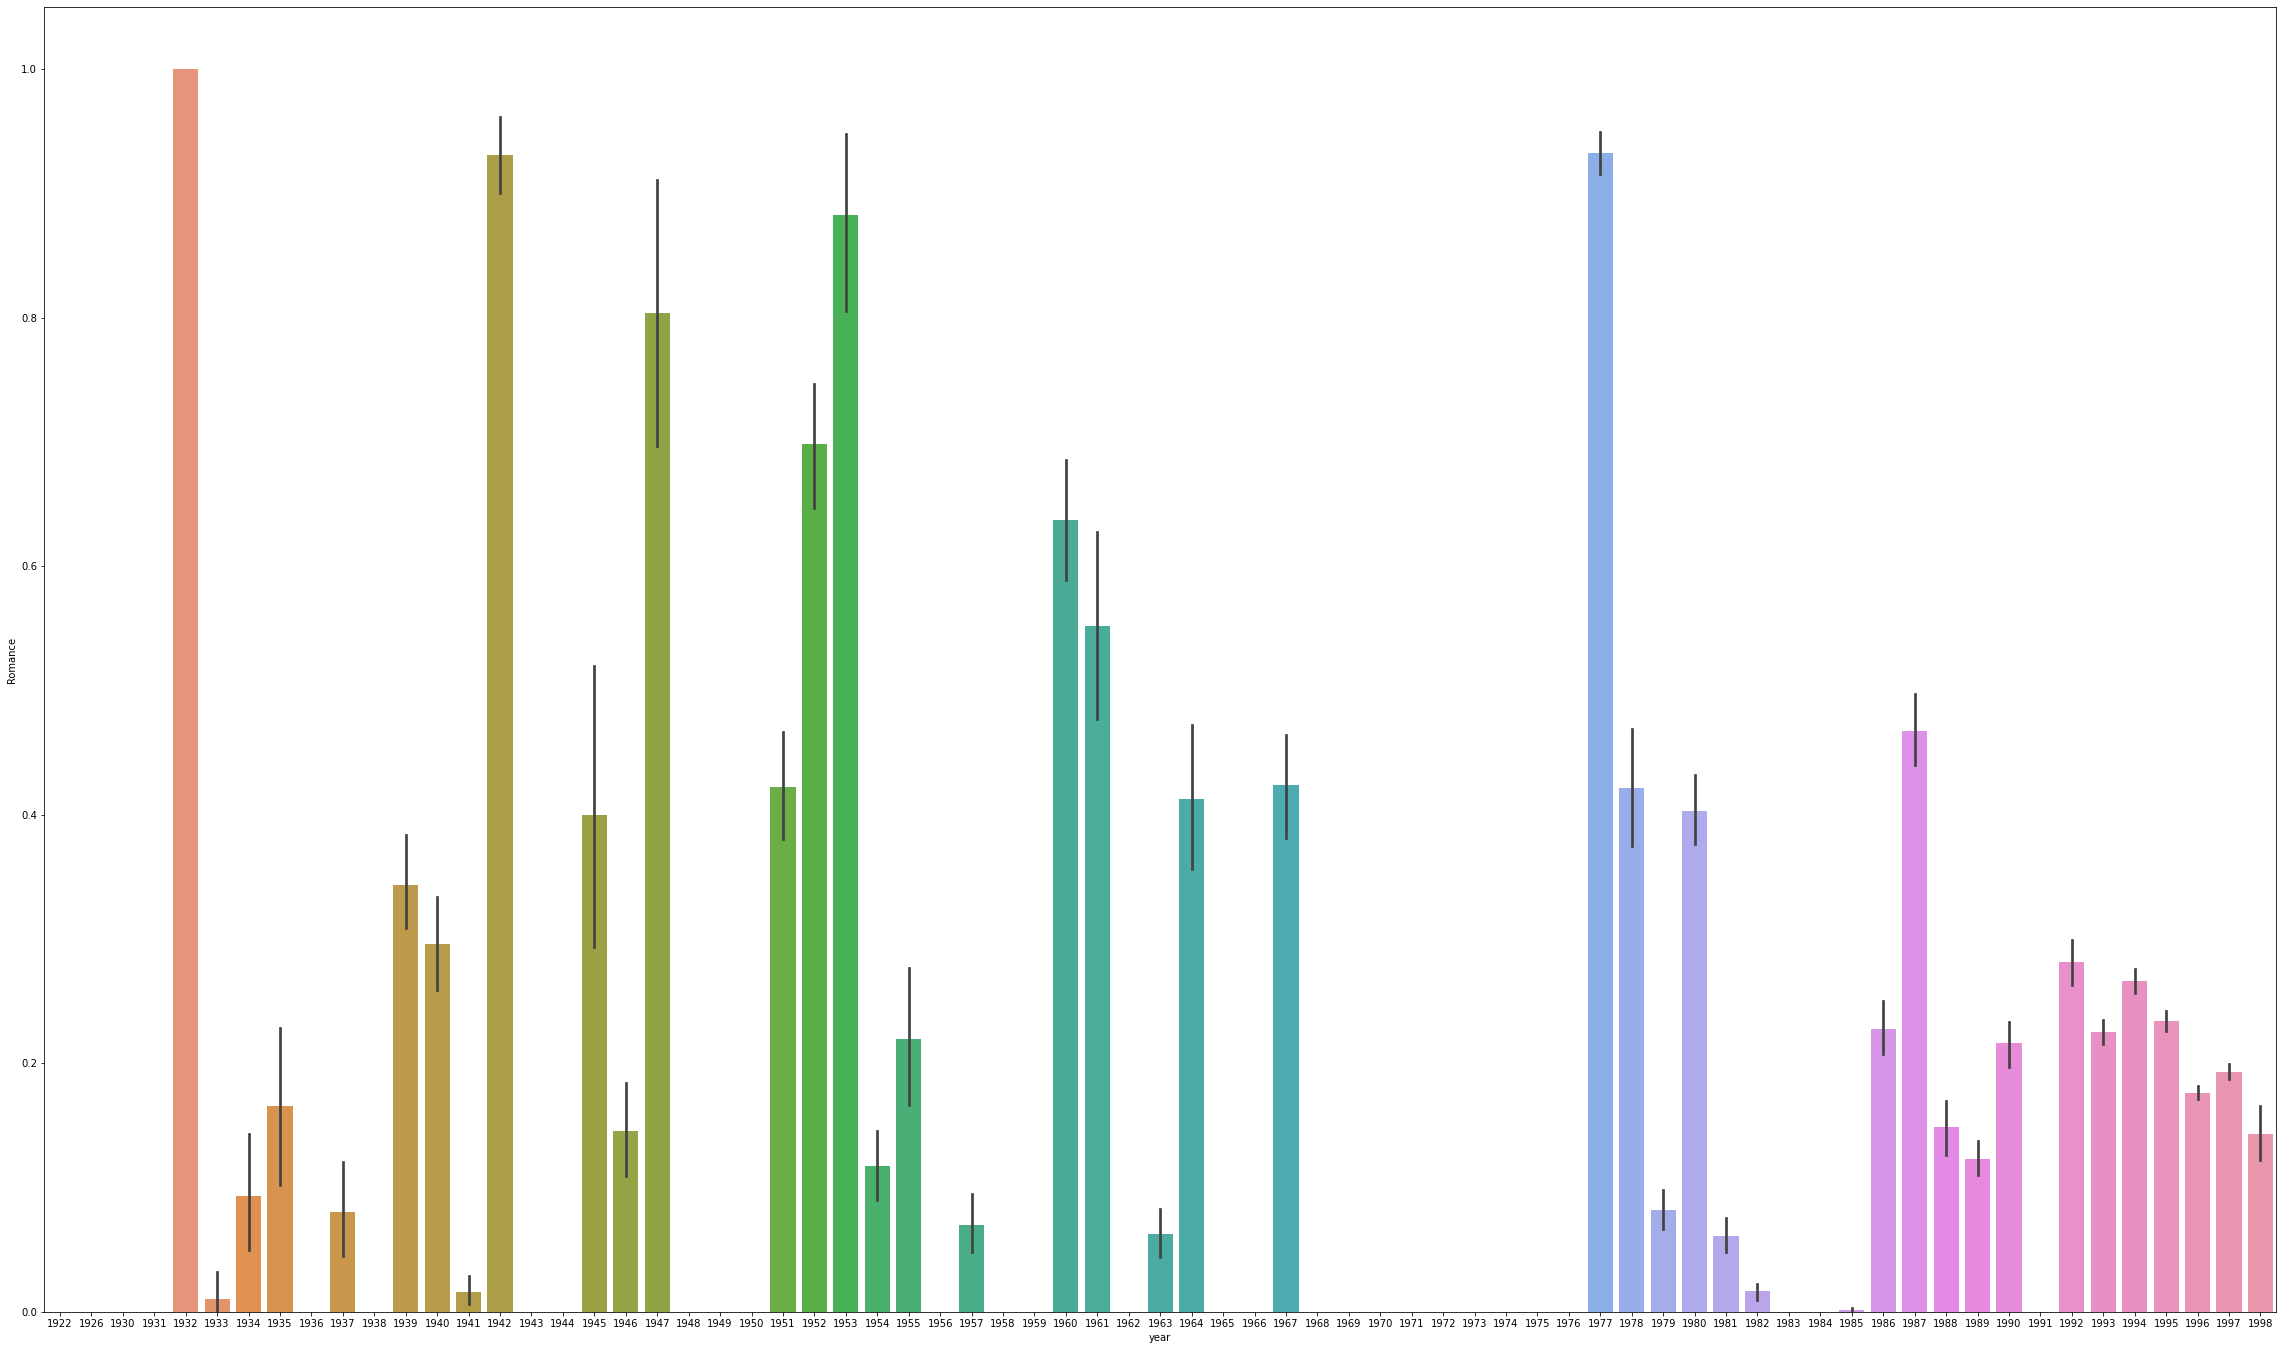

In [273]:
plt.figure(figsize=(40,24))
# Romance Genere over years
ax = sns.barplot(x='year', y='Romance', data=merged_movie_user_df)
plt.show()

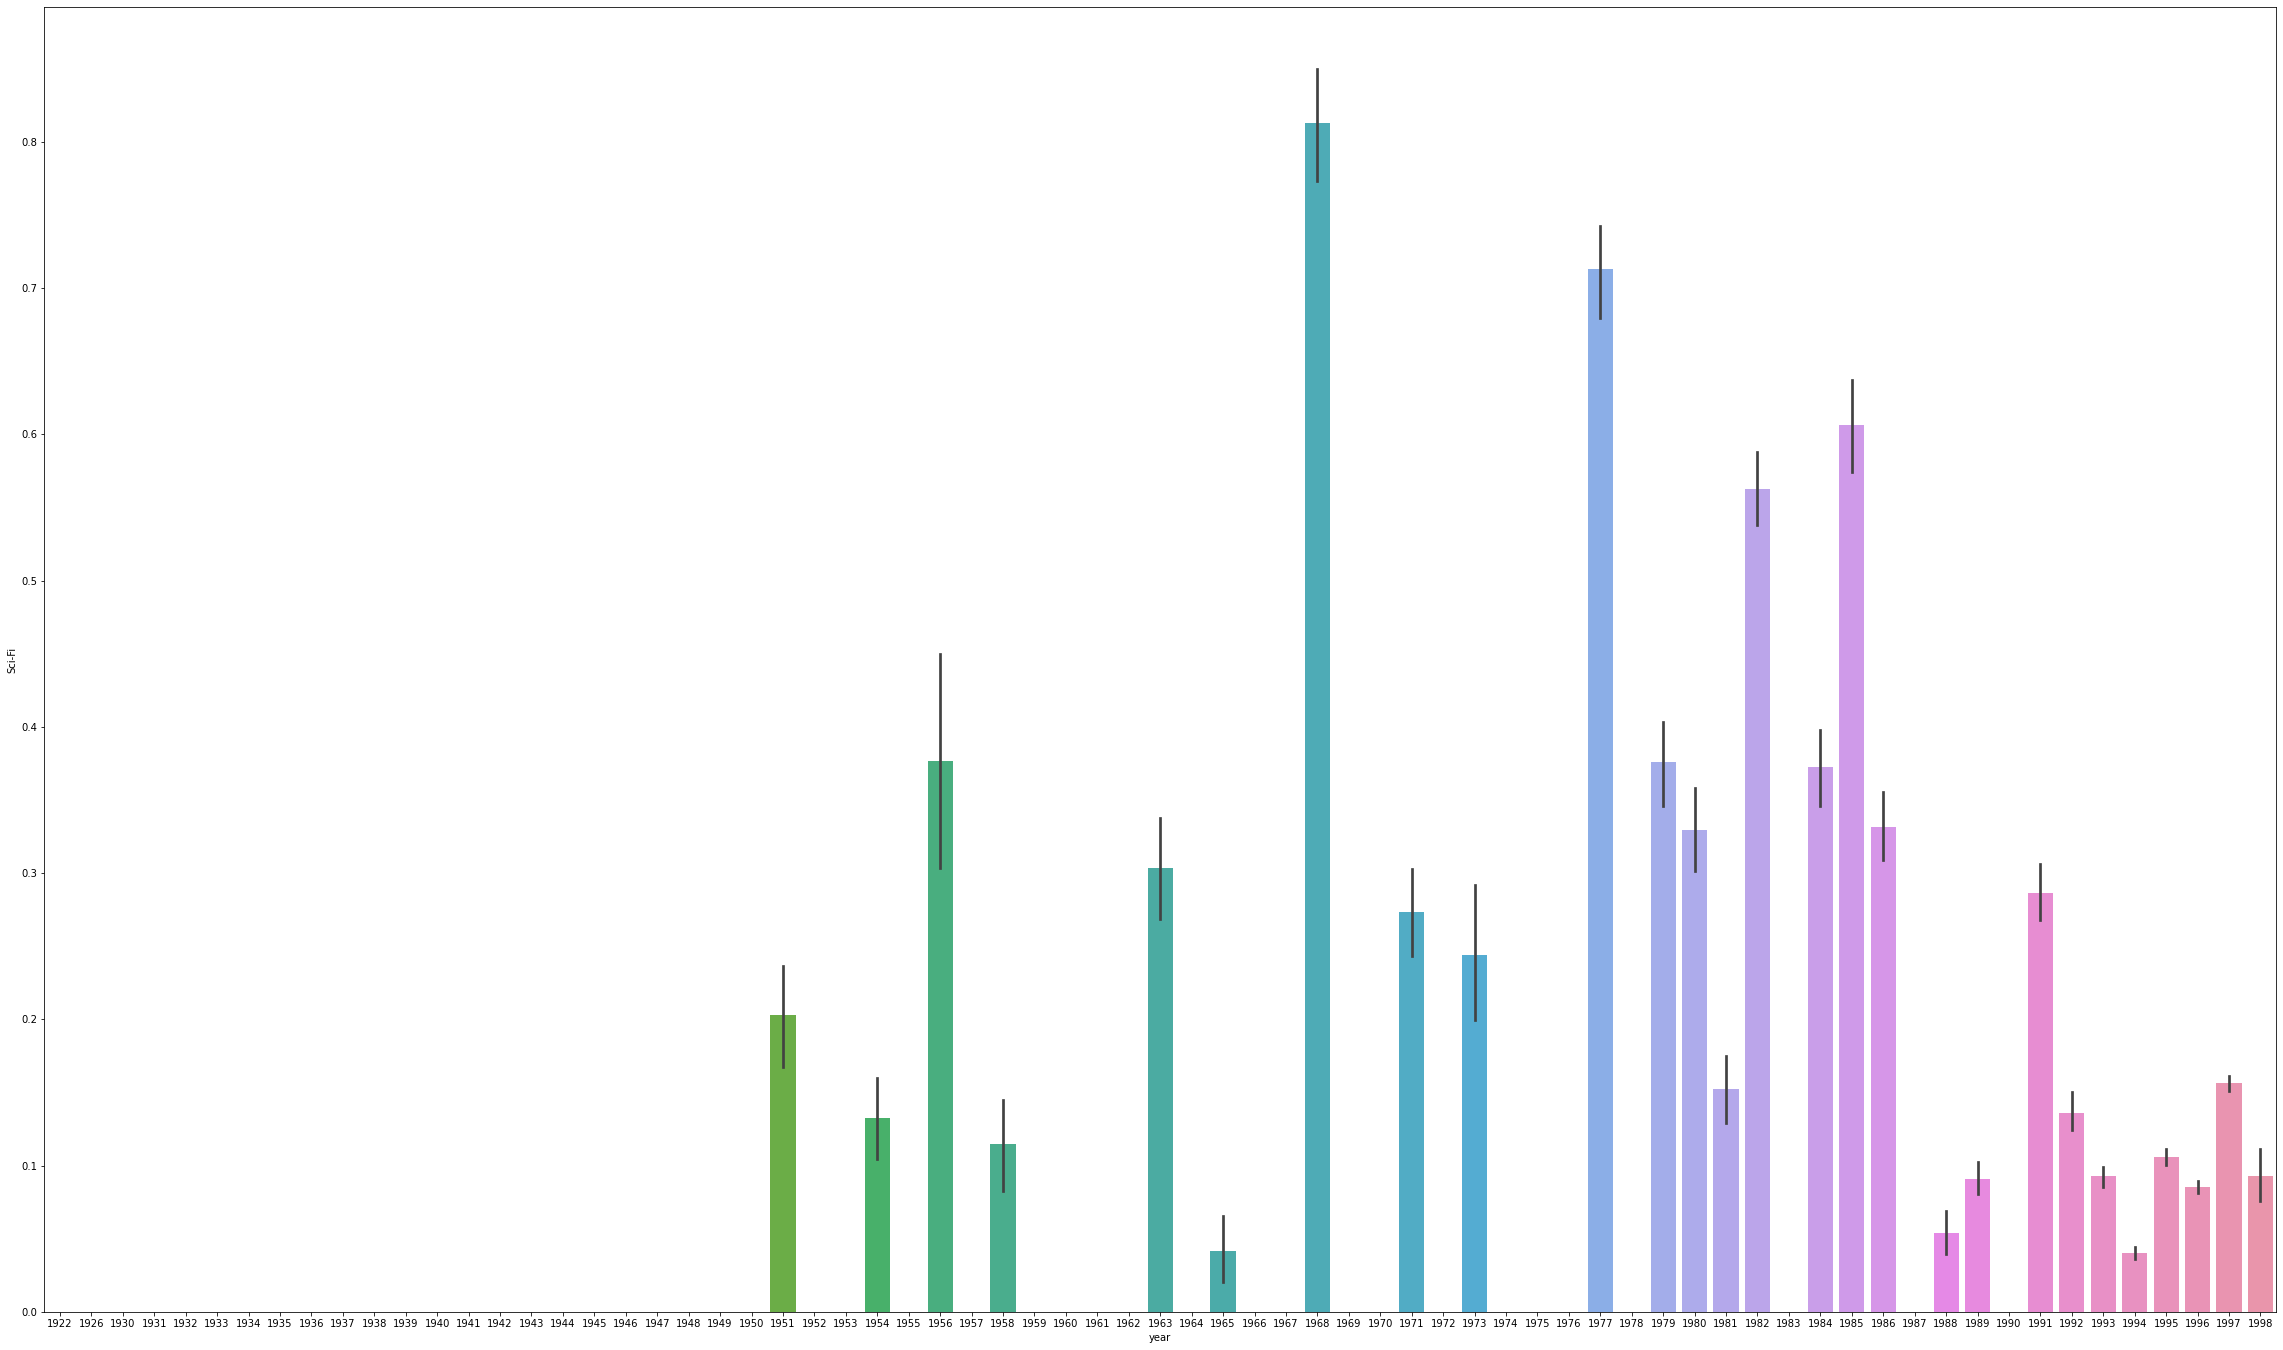

In [274]:
plt.figure(figsize=(40,24))
# Sci-Fi Genere over years
ax = sns.barplot(x='year', y='Sci-Fi', data=merged_movie_user_df)
plt.show()

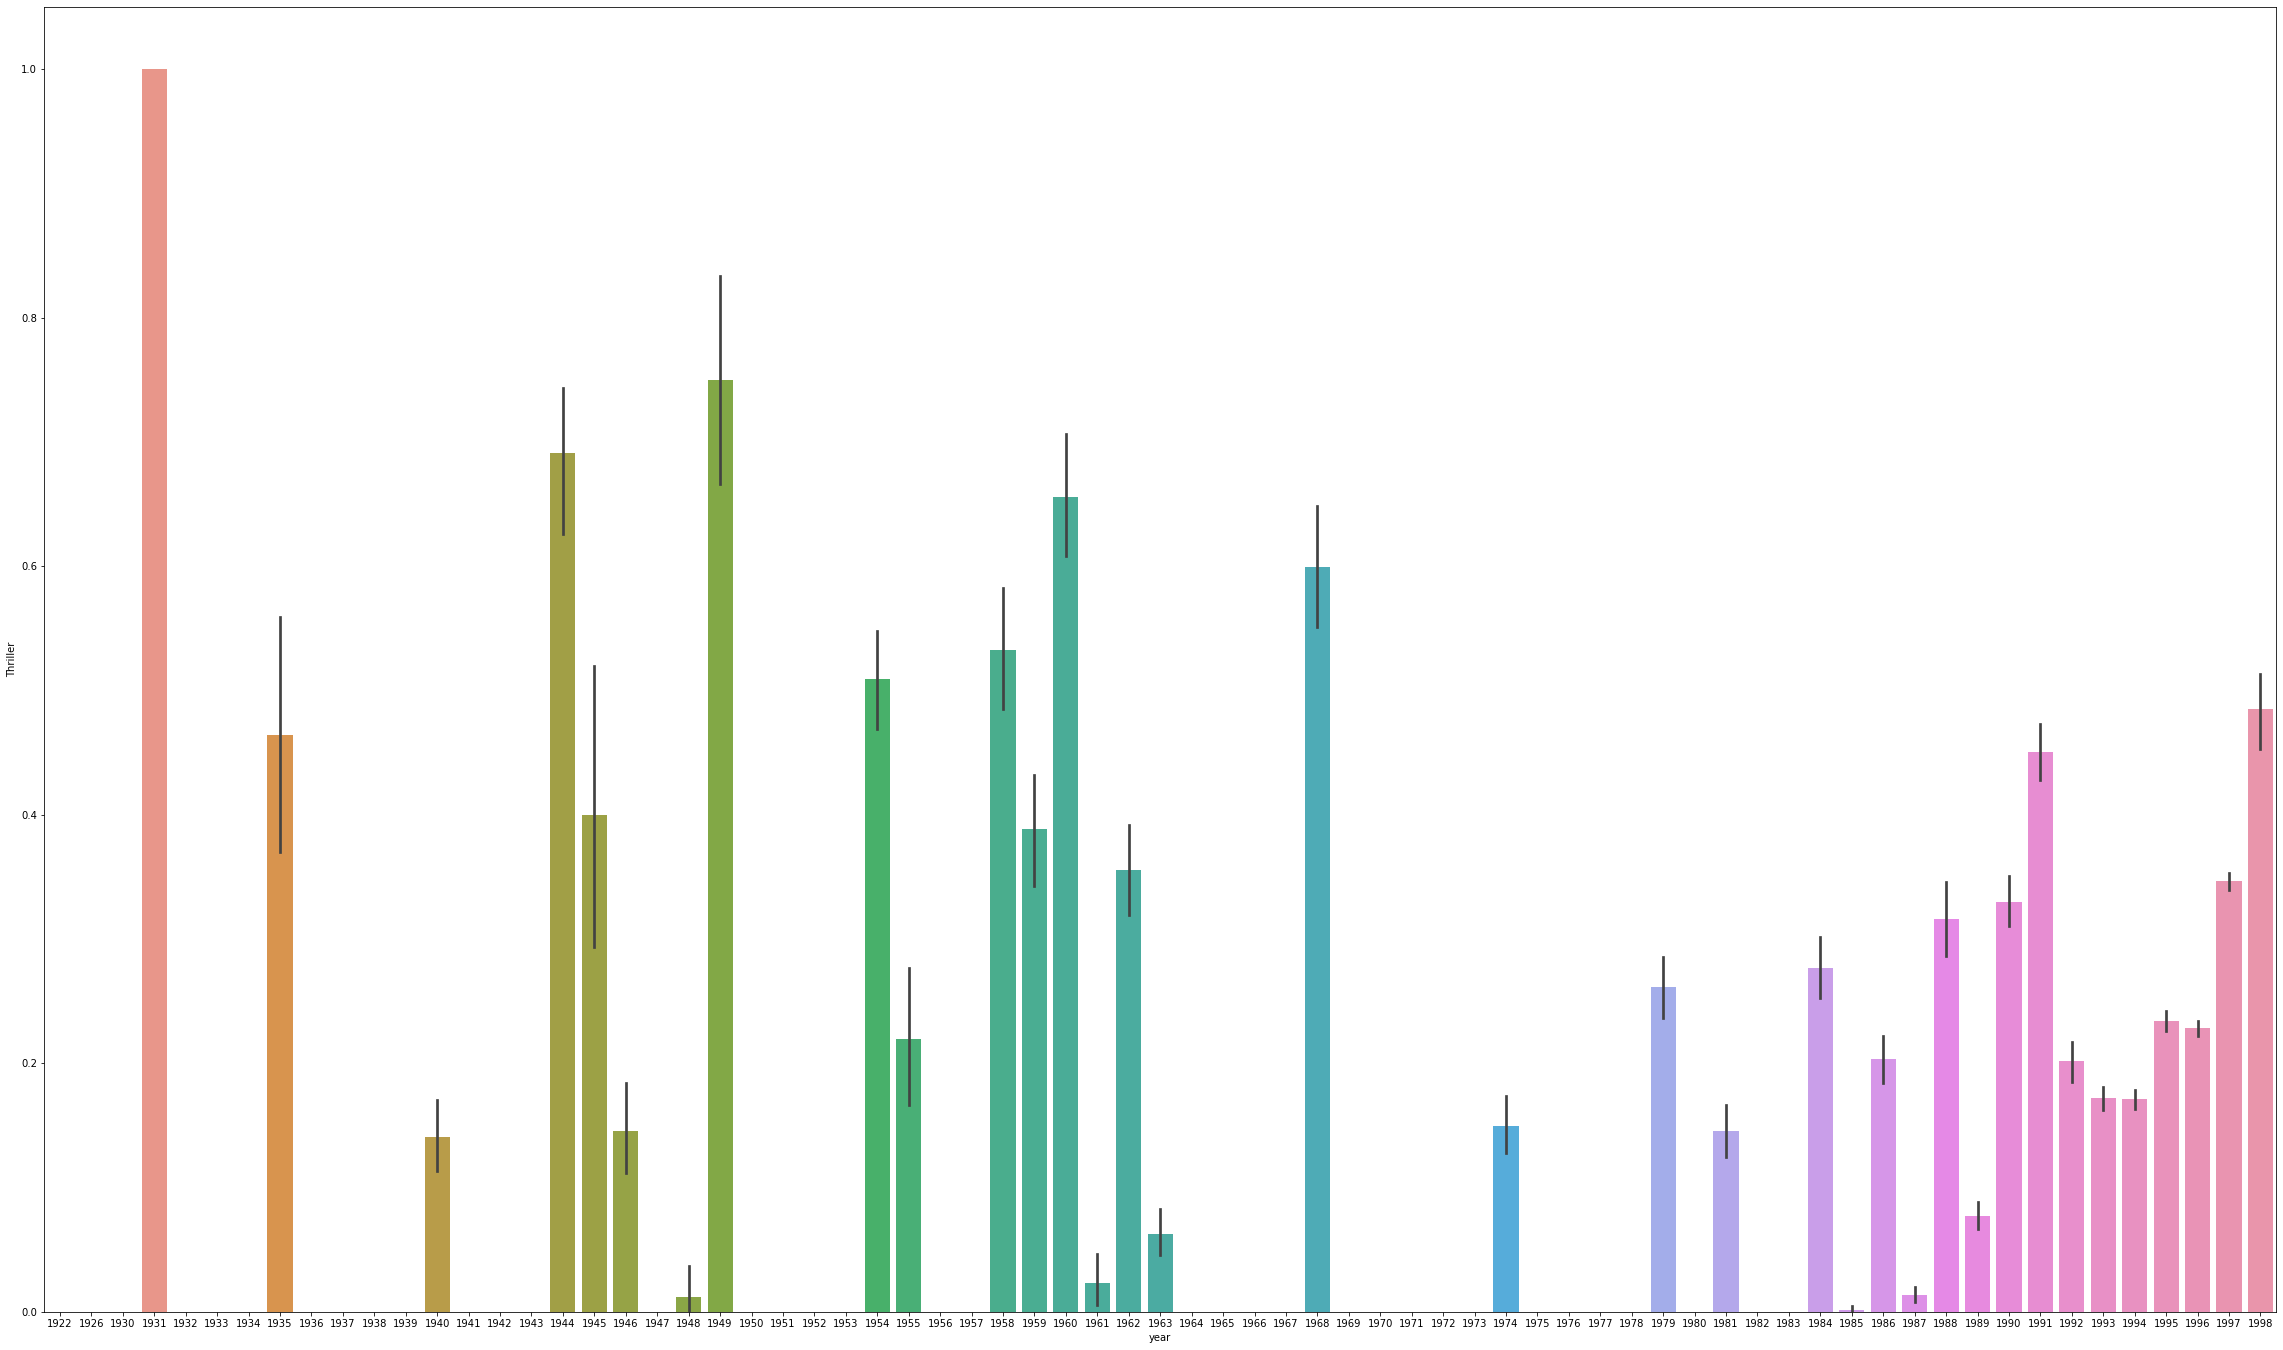

In [275]:
plt.figure(figsize=(40,24))
# Thriller Genere over years
ax = sns.barplot(x='year', y='Thriller', data=merged_movie_user_df)
plt.show()

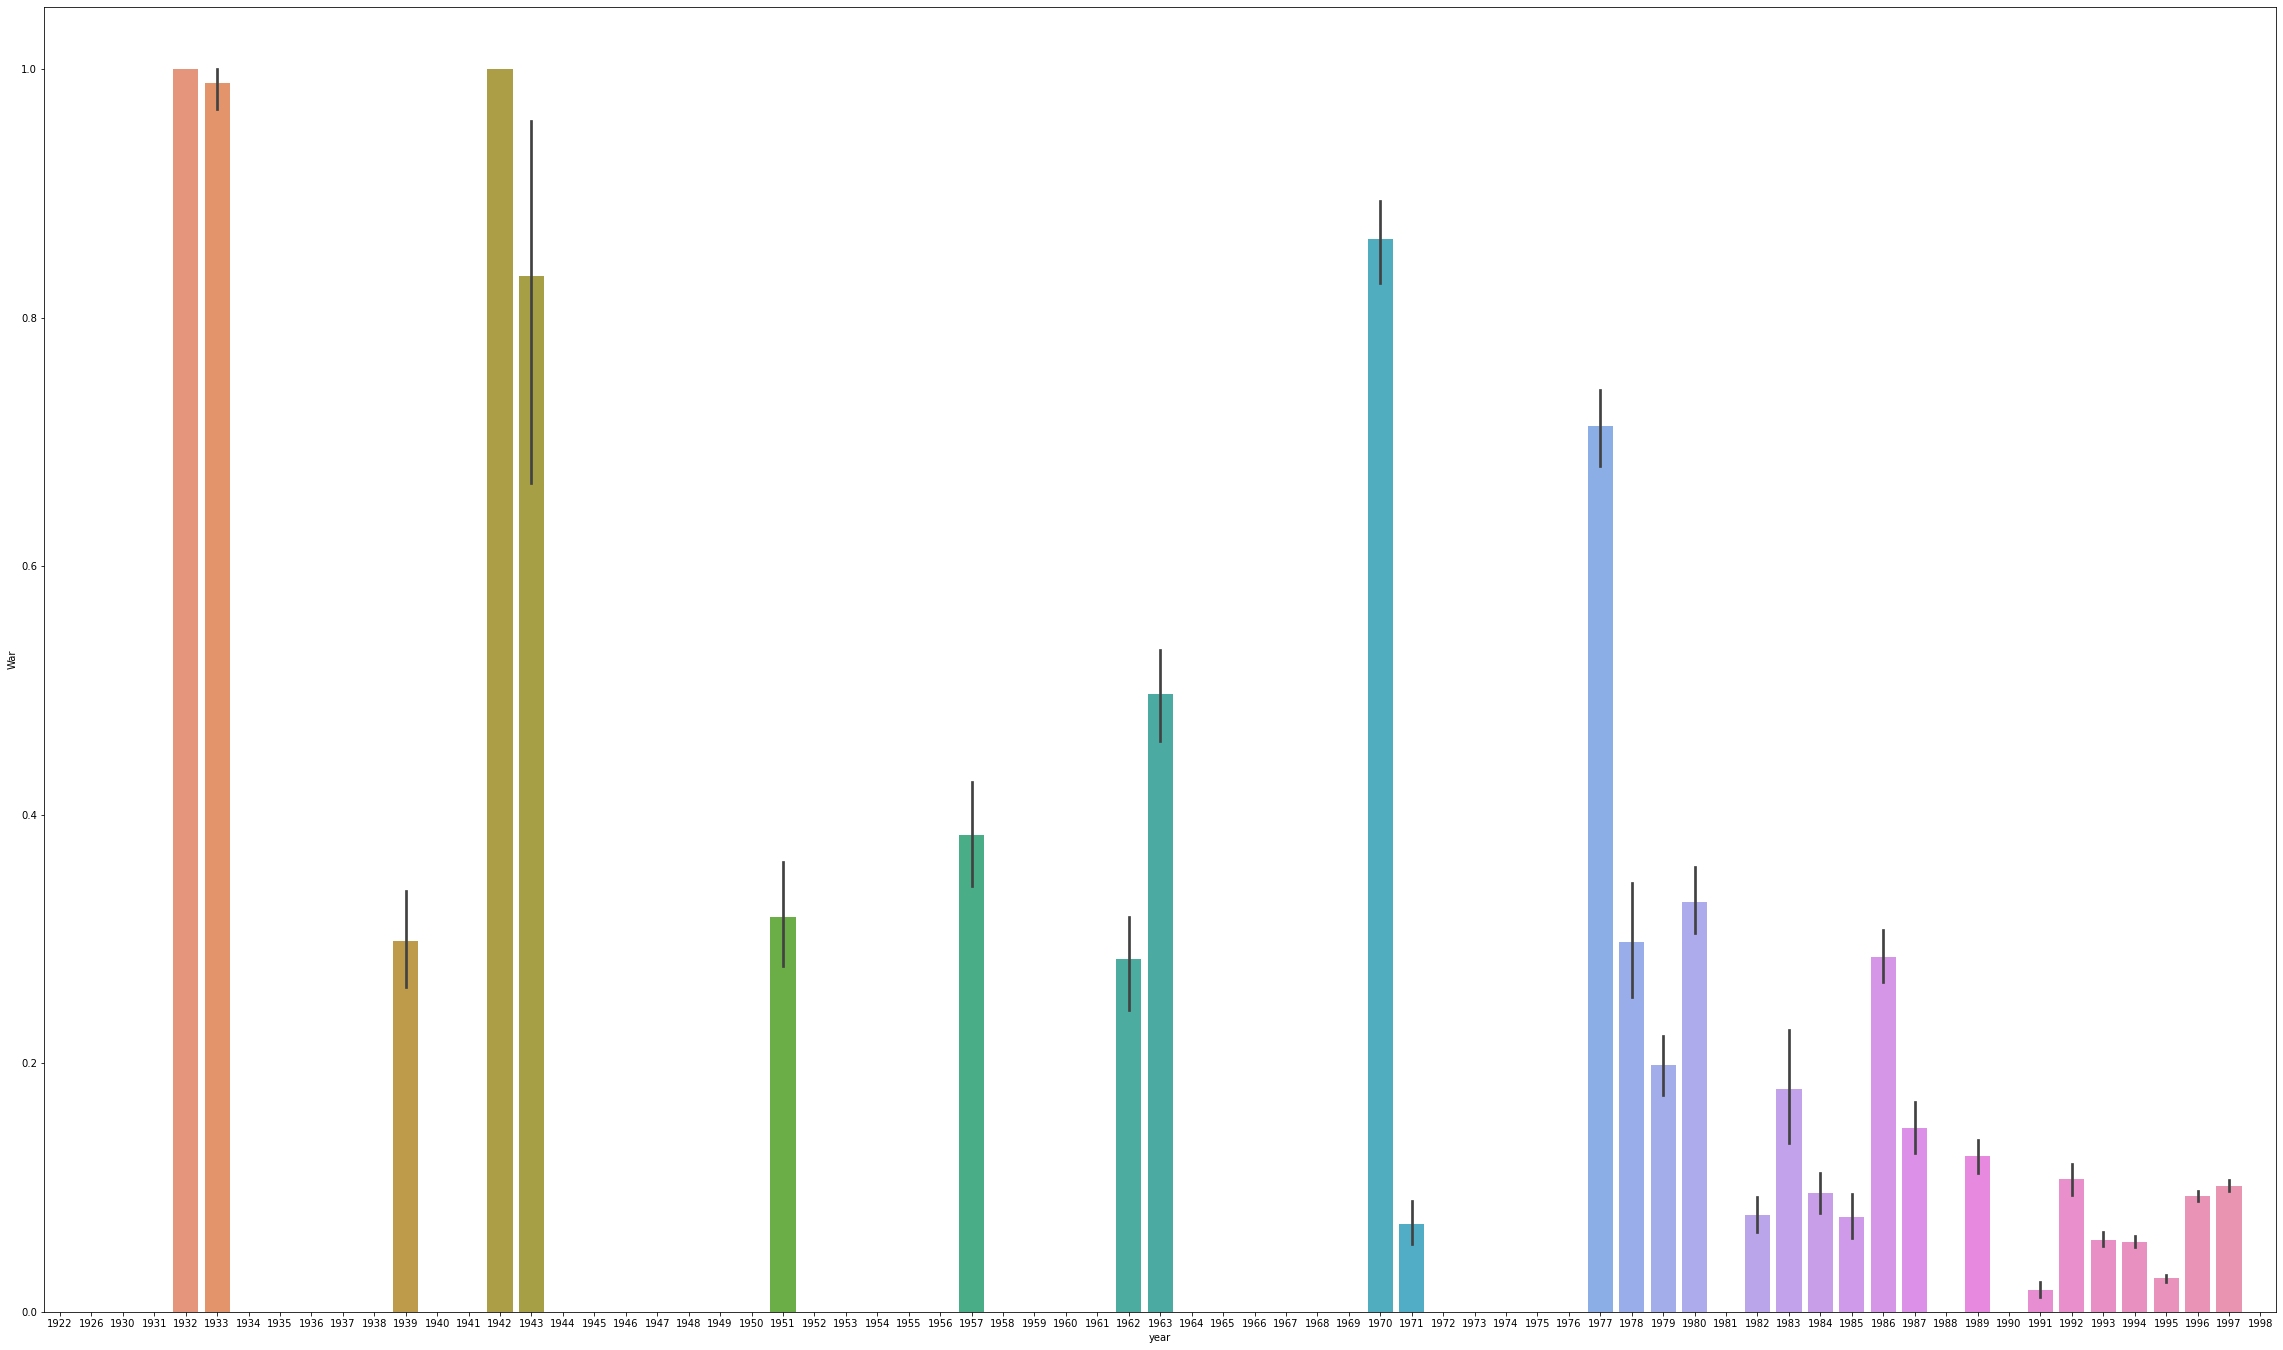

In [276]:
plt.figure(figsize=(40,24))
# War Genere over years
ax = sns.barplot(x='year', y='War', data=merged_movie_user_df)
plt.show()

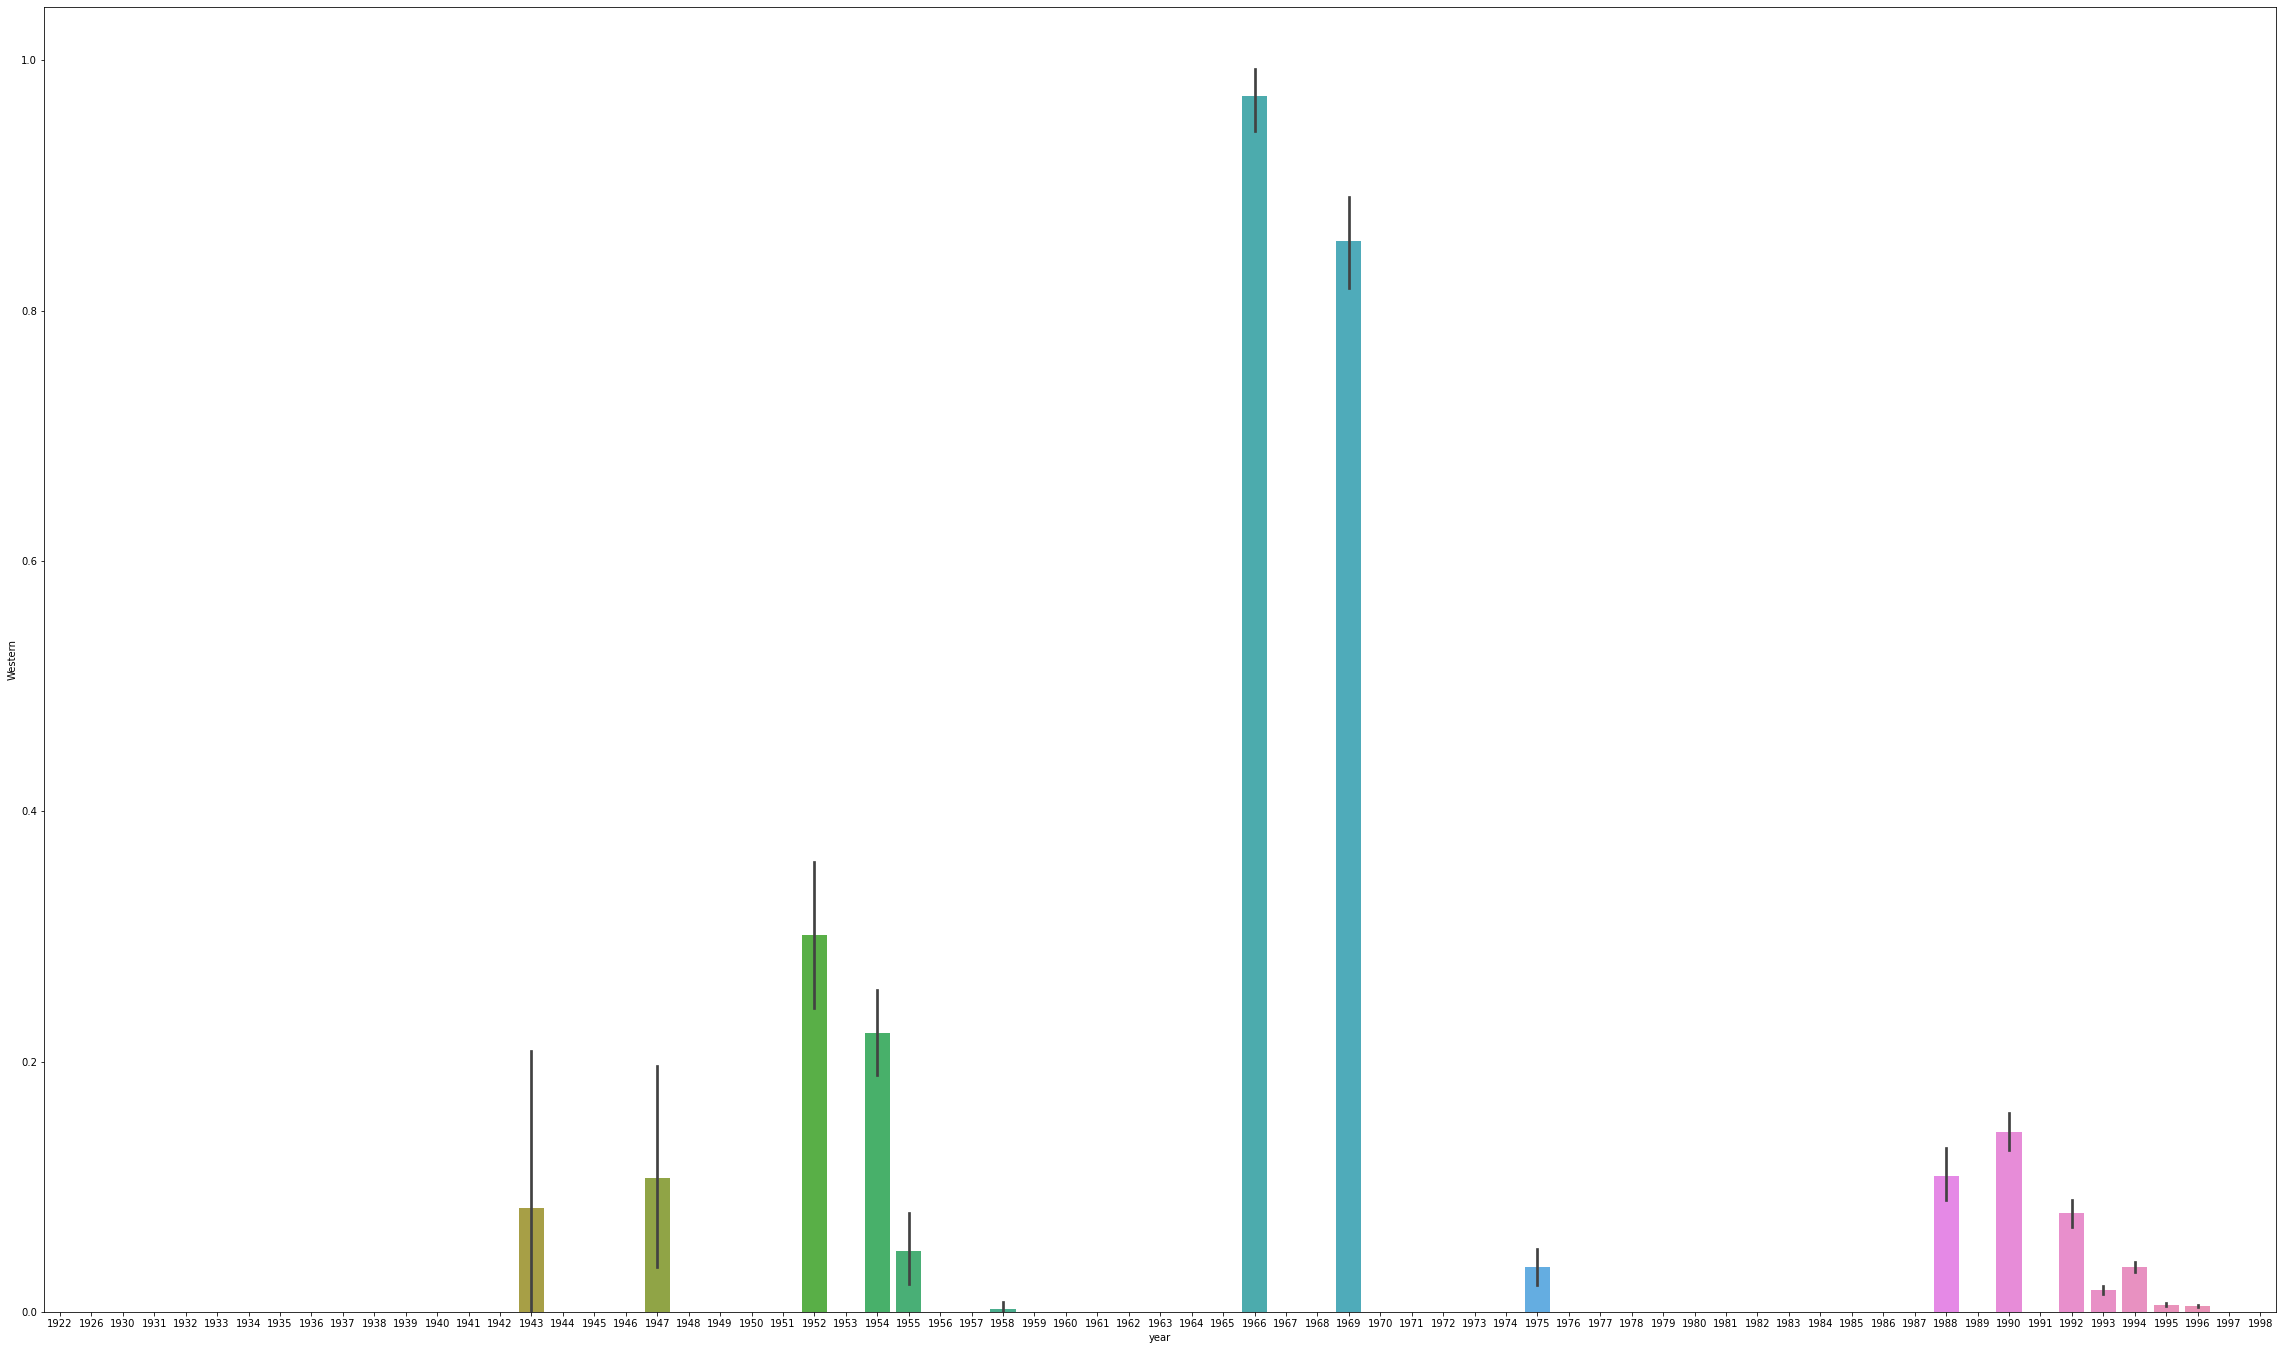

In [277]:
plt.figure(figsize=(40,24))
# Western Genere over years
ax = sns.barplot(x='year', y='Western', data=merged_movie_user_df)
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [326]:
#your answer here
#Show the movies with their rating aggregate.
print('=================================================================')
print('')
df1 = merged_movie_user_df.groupby("movie title")["rating"].count().reset_index(name='rating')
print(df1)
#Show the movies that have a rating aggregate of more than 100.
print('')
print('=================================================================')
print('')
#df2 = merged_movie_user_df.groupby('movie title').size().reset_index(name='rating')
df2 = df1.loc[df1['rating'] > 100]
print(df2)
print('')
print('=================================================================')
print('')
#Show the movies with their averare aggregate rating in decending order.
df3 = merged_movie_user_df.groupby("movie title")["rating"].mean().reset_index(name='average')
print(df3.sort_values('average', ascending=False))
print('')
print('=================================================================')
print('')
#Show the movies that have aggregate rating more than 100 according to their average rating.
df3 = pd.merge(left=df2, right=df3, how='left', left_on='movie title', right_on='movie title')
#df3 = merged_movie_user_df.groupby("movie title")["rating"].mean().reset_index(name='average')
print(df3.sort_values('average', ascending=False))
print('')
print('=================================================================')


                          movie title  rating
0                 'Til There Was You        9
1                              1-900        5
2                     101 Dalmatians      109
3                       12 Angry Men      125
4                                187       41
...                               ...     ...
1653                      Young Guns      101
1654                   Young Guns II       44
1655  Young Poisoner's Handbook, The       41
1656                Zeus and Roxanne        6
1657     Á köldum klaka (Cold Fever)        1

[1658 rows x 2 columns]


                                 movie title  rating
2                            101 Dalmatians      109
3                              12 Angry Men      125
7                     2001: A Space Odyssey      259
15                           Absolute Power      127
16                               Abyss, The      151
...                                      ...     ...
1628  Willy Wonka and the Chocolate Factory      

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [344]:
#Men watch more drama than women
print('=================================================================')
print('')
drama = merged_movie_user_df.groupby(by=["gender", "Drama"])["rating"].count().reset_index(name='rating')
print(drama)
print('')
# Men and women Watch the same percentage of Drama. This statement is false.
#  Men % 0.5 =  28887 / (45366 + 28887)
# Women % 0.5 = 11008 / (11008 + 14730)

#Women watch more Sci-Fi than men
print('=================================================================')
print('')
sci_fi = merged_movie_user_df.groupby(by=["gender", "Sci-Fi"])["rating"].count().reset_index(name='rating')
print(sci_fi)
print('')
# Men watch more Si-Fi than Woment. This statement is false.
#  Men % 0.136 =  10101 / (64152 + 10101)
# Women % 0.102 = 2629 / (23109 + 2629)


#Men watch more Romance than women
print('=================================================================')
print('')
Romance = merged_movie_user_df.groupby(by=["gender", "Romance"])["rating"].count().reset_index(name='rating')
print(Romance)
print('')
# Men watch more romance than Women. This statement is True.
#  Men % 0.389 =  28887 / (28887 + 45366)
# Women % 0.227 = 5858 / (5858 + 19880)
print('=================================================================')


  gender  Drama  rating
0      F      0   14730
1      F      1   11008
2      M      0   45366
3      M      1   28887


  gender  Sci-Fi  rating
0      F       0   23109
1      F       1    2629
2      M       0   64152
3      M       1   10101


  gender  Romance  rating
0      F        0   19880
1      F        1    5858
2      M        0   60650
3      M        1   13603

